<a href="https://colab.research.google.com/github/dretcm/Natural-Language-Processing-ACM/blob/main/Algoritmos_Clasificacion_Texto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Algoritmos de Clasificación de Texto

## Introduction

[Link pdf del curso](https://static.platzi.com/media/public/uploads/slides-clasificacion-texto_a68b15df-a0c0-4cc2-a658-00387fd2456e.pdf)

<h1>Por qué es tan dificil?</h1>

* El lenguaje humano es es difuso, ambiguo, y requiere mucho contexto.

![](https://github.com/dretcm/Natural-Language-Processing-ACM/blob/main/NL%20images/ambiguedad.png?raw=true)

**Ejemplos:**

* Debo ir al $banco$(sustantivo) para retirar dinero.
* Te puedes sentar en ese $banco$(sustantivo) para descansar.

* Mi hermano es una persona muy $noble$(adjetivo).

* El $noble$(sustantivo) del castillo no quiere ayudar a su pueblo.

Estas palabras hacen referencia a lo que se conoce en gramatica como Categorias Gramaticales (verbo, sustantivo, adjetivo, etc).

![](https://mdm.usta.edu.co/remos_downloads/lectoescritura/2015/1gramatica/Diapositiva8.JPG)

<h1>Ambiguedades del lenguaje</h1>

* **Por Agrupamiento:**

* * Pepe vio a Pablo enfurecido (que pepe esta enfurecido).
* * Pepe vio a Pablo, enfurecido (que pablo esta enfurecido).

* **Funcional:**

* * La gallina está lista para comer (que el animal gallina esta lista para comer).
* * La gallina está lista para comer (que gallina frita esta lista para comer).

* **Léxica:**

* * Mi hermano es una persona muy $noble$(adjetivo).

* * El $noble$(sustantivo) del castillo no quiere ayudar a su pueblo.

* * Homonimia(palabras que se escriben graficamente igual, pero diferente significado o sentido).

* * * Yo Río de la emocion. / El Río chili es grande.

* * Homofonía(palabras que suenan igual, pero con diferente significado y escritura).

* *  * Botar / Votar, Hierba / Hierva.

<h1>Aplicaciones de NLP</h1>

* Mejoras en motores de búsqueda, e-commerce y web.
* Automatización en manejo de CRMs(Customers Relashionship Management).
* Censura en redes sociales.
* Orden de datos no-estructurados.

## Etiquetado rápido en Python: español e inglés

In [ ]:
#@title Dependencias previas
import nltk
nltk.download('punkt')   # Tokenizador (tokenizer)
nltk.download('averaged_perceptron_tagger') # etiquetador (tagger)
from nltk import word_tokenize

In [ ]:
#@title Etiquetado en una línea ...
text = word_tokenize("And now here I am enjoying today")
nltk.pos_tag(text)

[('And', 'CC'),
 ('now', 'RB'),
 ('here', 'RB'),
 ('I', 'PRP'),
 ('am', 'VBP'),
 ('enjoying', 'VBG'),
 ('today', 'NN')]

In [ ]:
#@title Categoria gramatical de cada etiqueta
nltk.download('tagsets')
for tag in ['CC', 'RB', 'PRP', 'VBP', 'VBG', 'NN']:
  print(nltk.help.upenn_tagset(tag))

[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Unzipping help/tagsets.zip.
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
None
RB: adverb
    occasionally unabatingly maddeningly adventurously professedly
    stirringly prominently technologically magisterially predominately
    swiftly fiscally pitilessly ...
None
PRP: pronoun, personal
    hers herself him himself hisself it itself me myself one oneself ours
    ourselves ownself self she thee theirs them themselves they thou thy us
None
VBP: verb, present tense, not 3rd person singular
    predominate wrap resort sue twist spill cure lengthen brush terminate
    appear tend stray glisten obtain comprise detest tease attract
    emphasize mold postpone sever return wag ...
None
VBG: verb, present participle or gerund
    telegraphing stirring focusing angering judging stalling lactating
    hankerin' allegin

In [ ]:
#@title Palabras homónimas
text = word_tokenize("They do not permit other people to get residence permit")
nltk.pos_tag(text)

[('They', 'PRP'),
 ('do', 'VBP'),
 ('not', 'RB'),
 ('permit', 'VB'),
 ('other', 'JJ'),
 ('people', 'NNS'),
 ('to', 'TO'),
 ('get', 'VB'),
 ('residence', 'NN'),
 ('permit', 'NN')]

## Etiquetado en Español 

Para el ingles, NLTK tiene tokenizador y etiquetador pre-entrenados por defecto. En cambio, para otros idiomas es preciso entrenarlo previamente. 

* usamos el corpus `cess_esp` https://mailman.uib.no/public/corpora/2007-October/005448.html

* el cual usa una convención de etiquetas gramaticales dada por el grupo EAGLES https://www.cs.upc.edu/~nlp/tools/parole-sp.html

In [ ]:
nltk.download('cess_esp')
from nltk.corpus import cess_esp as cess
from nltk import UnigramTagger as ut
from nltk import BigramTagger as bt

In [ ]:
#@title Entrenamiendo del tagger por unigramas
cess_sents = cess.tagged_sents()
fraction = int(len(cess_sents)*90/100) # 90% train
uni_tagger = ut(cess_sents[:fraction])
uni_tagger.evaluate(cess_sents[fraction:]) # 10% test

0.8068832283915284

In [ ]:
uni_tagger.tag("Yo soy una persona muy amable".split(" "))

[('Yo', 'pp1csn00'),
 ('soy', 'vsip1s0'),
 ('una', 'di0fs0'),
 ('persona', 'ncfs000'),
 ('muy', 'rg'),
 ('amable', None)]

In [ ]:
for tag in ['pp1csn00', 'vsip1s0', 'di0fs0']:
  print(nltk.help.upenn_tagset(tag))# como no hay definiciones de modelos en español, no hay una definicon concreta de que son esas categorias Gramaticales.
  # pero el modelo supo distinguir una diferencia según con la data entrenada.

No matching tags found.
None
No matching tags found.
None
No matching tags found.
None


In [ ]:
#@title Entrenamiento del tagger por bigramas
fraction = int(len(cess_sents)*90/100)
bi_tagger = bt(cess_sents[:fraction])
bi_tagger.evaluate(cess_sents[fraction:])

0.10983113909559244

In [ ]:
bi_tagger.tag("Yo soy una persona muy amable".split(" "))

[('Yo', 'pp1csn00'),
 ('soy', 'vsip1s0'),
 ('una', None),
 ('persona', None),
 ('muy', None),
 ('amable', None)]

## Etiquetado mejorado con Stanza (StanfordNLP)

**Description**

The Part-of-Speech (POS) & morphological features tagging module labels words with their universal POS (UPOS) tags, treebank-specific POS (XPOS) tags, and universal morphological features (UFeats). This is jointly performed by the POSProcessor in Stanza, and can be invoked with the name pos.

**¿Que es Stanza?**

* El grupo de investigacion en NLP de Stanford tenía una suite de librerias que ejecutaban varias tareas de NLP, esta suite se unifico en un solo servicio que llamaron **CoreNLP** con base en codigo java: https://stanfordnlp.github.io/CoreNLP/index.html

* Para python existe **StanfordNLP**: https://stanfordnlp.github.io/stanfordnlp/index.html

* Sin embargo, **StanfordNLP** ha sido deprecado y las nuevas versiones de la suite de NLP reciben mantenimiento bajo el nombre de **Stanza**: https://stanfordnlp.github.io/stanza/

In [ ]:
!pip install stanza

In [ ]:
# esta parte puede demorar un poco ....
import stanza
stanza.download('es')

In [ ]:
nlp = stanza.Pipeline('es', processors='tokenize,pos')  # language, then tokenize, and finally pos(Part-Of-Speech)or grammatical categories.
doc = nlp('yo soy una persona muy amable')  # instance of nlp or Pipeline.
# Package: "ancora" es un corpus famoso en español.

2020-10-05 16:50:53 INFO: Loading these models for language: es (Spanish):
| Processor | Package |
-----------------------
| tokenize  | ancora  |
| pos       | ancora  |

2020-10-05 16:50:53 INFO: Use device: gpu
2020-10-05 16:50:53 INFO: Loading: tokenize
2020-10-05 16:51:01 INFO: Loading: pos
2020-10-05 16:51:02 INFO: Done loading processors!


In [ ]:
for sentence in doc.sentences:
  for word in sentence.words:
    print(word.text, word.pos)

yo PRON
soy AUX
una DET
persona NOUN
muy ADV
amable ADJ


<h1>Referencias adicionales:</h1>

* Etiquetado POS con Stanza https://stanfordnlp.github.io/stanza/pos.html#accessing-pos-and-morphological-feature-for-word

* Stanza | Github: https://github.com/stanfordnlp/stanza

* Articulo en ArXiv: https://arxiv.org/pdf/2003.07082.pdf

# 2. Modelos Markovianos Latentes (HMM)

## Introduction

<h1>Desambiguación y etiquetado de palabras</h1>

![](https://static.platzi.com/media/user_upload/markov-79db2c67-8051-423e-8e5a-deafd107d6d9.jpg)

<h1>Hidden Markov Models (HMM) and Chain Markov</h1>

* HMM o Modelos Markovianos Latentes esta basado en las cadenas de markov(Markov Chain):

![](https://static.platzi.com/media/user_upload/markov_chain-dd154438-c3a4-40aa-9bac-e19fc3a3a41c.jpg)

* **Probabilidades de transición:** como se ve de caliente a frio solo hay 2 transiciones, entonces la probabilidad de que de un día caliente pase a un día frio es de  "2/4".

* **matriz de transición:** Una matriz de todas las transiciones ya calculadas.

* **Distribucion inicial de estado:** hacemos un producto matricial de nuestra matriz de transición y la matriz de estado$^{(0)}$ donde contiene las probabilidades inciales de que un dia sea frio, caliente, o tibio, y obtenemos como resultado una nueva matriz de estado$^{(1)}$ con nuevas probabilidades de frio, caliente, y tibio; Quiere decir que las probabilidades van cambiando a medida que el sistema Evoluciona(estado 0 $->$ estado 1 $->$ estado 2 $->$ .... ).

**Nota:**

* La cadena de Markov es una serie de eventos, en la que la probabilidad de que ocurra un evento depende del evento anterior. Este tipo de cadenas tienen memoria.

![](https://static.platzi.com/media/user_upload/P_condicional-22761a82-0327-4238-afb6-4fa909c7e148.jpg)

[Video para reforzar P.Condicional](https://www.youtube.com/watch?v=rN6IWbanhy0)

<h1>Formula General de las Cadenas de Markov</h1>

![](https://static.platzi.com/media/user_upload/form_chain_markov-f2ba3e94-8edc-4766-b364-dca8f206c5bd.jpg)

<h1>Modelo Markoviano Latente</h1>

* por una lado una secuencia de palabras y por el otro lado una secuencia latente de etiquetas o categorias gramaticales.

![](https://github.com/dretcm/Natural-Language-Processing-ACM/blob/main/NL%20images/HMM_w_t.PNG?raw=true)

* lo que viene ahora es, dada una categoria gramatical cual es la probabilidad de que le corresponda a una cierta palabra, a esto se le llama "probabilidades de emision".

![](https://github.com/dretcm/Natural-Language-Processing-ACM/blob/main/NL%20images/P_e.PNG?raw=true)

* Y todo lo anterior ya mensionado se le conoce como Modelo Markoviano Latente.

![](https://github.com/dretcm/Natural-Language-Processing-ACM/blob/main/NL%20images/ingrediente_HMM.PNG?raw=true)

* El objetivo de una HMM es encontrar "Dada una secuencia de palabras, cual es la secuencia de etiquetas que le corresponte por mayor probabilidad".

<h1>Matematicas de Probabilidades de Emision:</h1>

![](https://static.platzi.com/media/user_upload/mates_B_emision-9dedde55-66a0-4406-8253-6799c7c8f472.jpg)

**Hipotesis Independiente:**

* nos dice que las probabilidades de palabras a etiquetas solamente dependen de la misma posición.

**Hipotesis Markoviana:**

* nos dice que un estado depende del estado inmediatamente del estado anterior, recordemos el ejemplo de los climas, donde para que una día sea caliente, frio, o tibio dependian del estado anterior.

**Entrenar el Modelo de HMM**

* A: Matriz de transición.
* B: Probabilidades de Emision.
* $MODELO(A, B)$

## Fase de entrenamiento de una HMM

### Corpus de español: 

* AnCora | Github: https://github.com/UniversalDependencies/UD_Spanish-AnCora

* usamos el conllu parser para leer el corpus: https://pypi.org/project/conllu/

* Etiquetas Universal POS (Documentación): https://universaldependencies.org/u/pos/

In [ ]:
#@title dependencias previas
!pip install conllu
!git clone https://github.com/UniversalDependencies/UD_Spanish-AnCora.git

In [ ]:
#@title leyendo el corpus AnCora
from conllu import parse_incr 
wordList = []
data_file = open("UD_Spanish-AnCora/es_ancora-ud-dev.conllu", "r", encoding="utf-8")
for tokenlist in parse_incr(data_file):
    print(tokenlist.serialize())

In [ ]:
tokenlist

TokenList<Lo, cierto, es, que, a, mí, ,, me, da, un, poco, de, pena, .>

In [ ]:
#@title Estructura de los tokens etiquetados del corpus
tokenlist[1]

{'deprel': 'nsubj',
 'deps': None,
 'feats': {'Gender': 'Masc', 'Number': 'Sing'},
 'form': 'cierto',
 'head': 3,
 'id': 2,
 'lemma': 'cierto',
 'misc': None,
 'upos': 'ADJ',
 'xpos': 'ADJ'}

In [ ]:
tokenlist[1]['form']+'|'+tokenlist[1]['upos']

'cierto|ADJ'

### Entrenamiento del modelo - Calculo de conteos:

* tags (tags) `tagCountDict`: $C(tag)$
* emisiones (word|tag) `emissionProbDict`: $C(word|tag)$
* transiciones (tag|prevtag) `transitionDict`: $C(tag|prevtag)$

In [ ]:
tagCountDict = {} 
emissionDict = {}
transitionDict = {}

tagtype = 'upos'
data_file = open("UD_Spanish-AnCora/es_ancora-ud-dev.conllu", "r", encoding="utf-8")

# Calculando conteos (pre-probabilidades)
for tokenlist in parse_incr(data_file):
  prevtag = None
  for token in tokenlist:

    # C(tag)
    tag = token[tagtype]
    if tag in tagCountDict.keys():
      tagCountDict[tag] += 1
    else:
      tagCountDict[tag] = 1

    # C(word|tag) -> probabilidades emision
    wordtag = token['form'].lower()+'|'+token[tagtype] # (word|tag)
    if wordtag in emissionDict.keys():
      emissionDict[wordtag] = emissionDict[wordtag] + 1
    else:
      emissionDict[wordtag] = 1

    #  C(tag|tag_previo) -> probabilidades transición
    if prevtag is None:
      prevtag = tag
      continue
    transitiontags = tag+'|'+prevtag
    if transitiontags in transitionDict.keys():
      transitionDict[transitiontags] = transitionDict[transitiontags] + 1
    else:
      transitionDict[transitiontags] = 1
    prevtag = tag
    
#transitionDict
#emissionDict
#tagCountDict

### Entrenamiento del modelo - calculo de probabilidades
* probabilidades de transición:
$$P(tag|prevtag) = \frac{C(prevtag, tag)}{C(prevtag)}$$

* probabilidades de emisión:
 $$P(word|tag) = \frac{C(word|tag)}{C(tag)}$$

In [ ]:
transitionProbDict = {} # matriz A  hipo.markoviana
emissionProbDict = {} # matriz B  hipo.idependiente

# transition Probabilities 
for key in transitionDict.keys():
  tag, prevtag = key.split('|')
  if tagCountDict[prevtag]>0:
    transitionProbDict[key] = transitionDict[key]/(tagCountDict[prevtag])
  else:
    print(key)

# emission Probabilities 
for key in emissionDict.keys():
  word, tag = key.split('|')
  if emissionDict[key]>0:
    emissionProbDict[key] = emissionDict[key]/tagCountDict[tag]
  else:
    print(key)

transitionProbDict['ADJ|ADJ']
#emissionProbDict

0.030225988700564973

In [ ]:
transitionProbDict

In [ ]:
emissionProbDict

In [ ]:
# para hacer un sort sobre estos diccionarios basados en los valores de las probabilidades encontradas.
# transition sorted
sorted_transitionprobs = sorted(transitionProbDict.items(), key = lambda x: x[1], reverse=True)
sorted_transitionprobs


# Emission sorted
sorted_emissionprobs = sorted(emissionProbDict.items(), key = lambda x: x[1], reverse=True)
sorted_emissionprobs


## Guardar parámetros del modelo

In [ ]:
import numpy as np
np.save('transitionHMM.npy', transitionProbDict)
np.save('emissionHMM.npy', emissionProbDict)
transitionProbdict = np.load('transitionHMM.npy', allow_pickle='TRUE').item()
transitionProbDict['ADJ|ADJ']

0.030225988700564973

# 3. Algoritmo de Viterbi

## introduction

<h1>Etiquetado con HMM</h1>

* **Entrenamiento del HMM:**

* *  El modelo aprende las probabilidades de transición y emisión.

* **Decodificacion:**

* * Viterbi lo que hace es calculara un probabilidad para cada secuencia de etiquetas eligiendo la más probable o mayor, las cuales son las etiquetas correctas para nuestra secuencia de palabras.

* * <h1>$t^{ñ} = arg max_{(t^n)} \Pi_{i}^{n} \underbrace{[P(w_i | t_i)}_{\text{Emisión}} \underbrace{P(t_i | t_{i-1})}_{\text{Transición}}]$</h1>

![img](https://github.com/dretcm/Natural-Language-Processing-ACM/blob/main/NL%20images/niveles_HMM.PNG?raw=true)

* los plonos son los que tiene probabilidad cero de que sean la etiqueta de "castillo" y los azules son los que tienen probabilidad de ser la equita.

* cada azul tendra un camino de posibles etiquetas para la oración.

* ahora tendremos que elegir la secuencia de etiquetas más probable para nuestra oración.

![](https://github.com/dretcm/Natural-Language-Processing-ACM/blob/main/NL%20images/viterbi_1.PNG?raw=true)

* selecionamos un camino para ver la posibilidad inicial de que sea "Sustantivo Propio(Prop)"

![](https://github.com/dretcm/Natural-Language-Processing-ACM/blob/main/NL%20images/viterbi_2.PNG?raw=true)

* $P^{(0)}_{prop}$ =  Cual es la probabilidad inicial de que PROP este como la primera categoria gramatical en una secuencia de palabras en un corpus de palabras.

* $P(castillo|PROP)$ = la probabilidad de que dado un PROP le corresponda la palabra castillo.

* calculamos tambien la probabilidad del "sustantivo(Noun)", y ahora ya tenemos todas las probabilidades de la primera columna.

![](https://github.com/dretcm/Natural-Language-Processing-ACM/blob/main/NL%20images/viterbi_3.PNG?raw=true)

* ahora calculamos la probabilidad de la segunda columna, donde se calculara la mayor probabilidad entre "a1 y a2".

![](https://github.com/dretcm/Natural-Language-Processing-ACM/blob/main/NL%20images/viterbi_4.PNG?raw=true)

* y hacemos el mismo proceso con todos los nodos posibles que sean azules.

* lo que hace el algoritmo de viterbi es buscar en un espacio de muchas posibilidades el camino más posible de etiquetas para nuestra oración.

**Cálculo de las probabilidades de Viterbi**

---



![](https://github.com/dretcm/Natural-Language-Processing-ACM/blob/main/NL%20images/viterbi_5.PNG?raw=true)

![](https://github.com/dretcm/Natural-Language-Processing-ACM/blob/main/NL%20images/viterbi_6.png?raw=true)

## Carga del modelo HMM y distribución inicial

In [ ]:
# cargamos las probabilidades del modelo HMM
import numpy as np
transitionProbdict = np.load('transitionHMM.npy', allow_pickle='TRUE').item()
emissionProbdict = np.load('emissionHMM.npy', allow_pickle='TRUE').item()

In [ ]:
# identificamos las categorias gramaticales 'upos' unicas en el corpus
stateSet = set([w.split('|')[1] for w in list(emissionProbdict.keys())])
print(stateSet)

{'PUNCT', 'PRON', 'VERB', 'SCONJ', 'NOUN', 'ADP', 'CCONJ', 'AUX', '_', 'PROPN', 'ADV', 'INTJ', 'DET', 'ADJ', 'SYM', 'PART', 'NUM'}


In [ ]:
# enumeramos las categorias con numeros para asignar a 
# las columnas de la matriz de Viterbi
tagStateDict = {}
for i, state in enumerate(stateSet):
  tagStateDict[state] = i

print(tagStateDict)
len(tagStateDict), min(tagStateDict.values()), max(tagStateDict.values())

{'PUNCT': 0, 'PRON': 1, 'VERB': 2, 'SCONJ': 3, 'NOUN': 4, 'ADP': 5, 'CCONJ': 6, 'AUX': 7, '_': 8, 'PROPN': 9, 'ADV': 10, 'INTJ': 11, 'DET': 12, 'ADJ': 13, 'SYM': 14, 'PART': 15, 'NUM': 16}


(17, 0, 16)

In [ ]:
test = {1:100,2:200,3:300}
print(test.keys())
print(test.values())
d = [3,3,2,1,5,5,4,3,2,1,1,7]
print(set(d))  # elementos unicos y ordena

dict_keys([1, 2, 3])
dict_values([100, 200, 300])
{1, 2, 3, 4, 5, 7}


## Distribucion inicial de estados latentes

In [ ]:
# Calculamos distribución inicial de estados
initTagStateProb = {} # \rho_i^{(0)}
from conllu import parse_incr 
wordList = []
data_file = open("UD_Spanish-AnCora/es_ancora-ud-dev.conllu", "r", encoding="utf-8")
count = 0 # cuenta la longitud del corpus
for tokenlist in parse_incr(data_file):
  count += 1
  tag = tokenlist[0]['upos']
  if tag in initTagStateProb.keys():
    initTagStateProb[tag] += 1
  else:
    initTagStateProb[tag] = 1

for key in initTagStateProb.keys():
  initTagStateProb[key] /= count

initTagStateProb

{'ADJ': 0.010882708585247884,
 'ADP': 0.16384522370012092,
 'ADV': 0.06287787182587666,
 'AUX': 0.022370012091898428,
 'CCONJ': 0.03325272067714631,
 'DET': 0.3633615477629988,
 'INTJ': 0.0006045949214026602,
 'NOUN': 0.02720677146311971,
 'NUM': 0.01995163240628779,
 'PART': 0.0018137847642079807,
 'PRON': 0.034461910519951636,
 'PROPN': 0.1124546553808948,
 'PUNCT': 0.07799274486094317,
 'SCONJ': 0.02418379685610641,
 'SYM': 0.0006045949214026602,
 'VERB': 0.04353083434099154,
 '_': 0.0006045949214026602}

In [ ]:
# verificamos que la suma de las probabilidades es 1 (100%)
print(np.array([initTagStateProb[k] for k in initTagStateProb.keys()]).sum())
print(np.array(list(initTagStateProb.values())).sum())
print(sum(list(initTagStateProb.values())))
print(sum([initTagStateProb[i] for i in initTagStateProb]))
print(sum(initTagStateProb.values()))

1.0
1.0
1.0
1.0
1.0


## Construcción del algoritmo de Viterbi






Dada una secuencia de palabras $\{p_1, p_2, \dots, p_n \}$, y un conjunto de categorias gramaticales dadas por la convención `upos`, se considera la matriz de probabilidades de Viterbi así:

$$
\begin{array}{c c}
\begin{array}{c c c c}
\text{ADJ} \\
\text{ADV}\\
\text{PRON} \\
\vdots \\
{}
\end{array} 
&
\left[
\begin{array}{c c c c}
\nu_1(\text{ADJ}) & \nu_2(\text{ADJ}) & \dots  & \nu_n(\text{ADJ})\\
\nu_1(\text{ADV}) & \nu_2(\text{ADV}) & \dots  & \nu_n(\text{ADV})\\ 
\nu_1(\text{PRON}) & \nu_2(\text{PRON}) & \dots  & \nu_n(\text{PRON})\\
\vdots & \vdots & \dots & \vdots \\ \hdashline
p_1 & p_2 & \dots & p_n 
\end{array}
\right] 
\end{array}
$$

Donde las probabilidades de la primera columna (para una categoria $i$) están dadas por: 

$$
\nu_1(i) = \underbrace{\rho_i^{(0)}}_{\text{probabilidad inicial}} \times \underbrace{P(p_1 \vert i)}_{\text{emisión}}
$$

luego, para la segunda columna (dada una categoria $j$) serán: 

$$
\nu_2(j) = \max_i \{ \nu_1(i) \times \underbrace{P(j \vert i)}_{\text{transición}} \times \underbrace{P(p_2 \vert j)}_{\text{emisión}} \}
$$

así, en general las probabilidades para la columna $t$ estarán dadas por: 

$$
\nu_{t}(j) = \max_i \{ \overbrace{\nu_{t-1}(i)}^{\text{estado anterior}} \times \underbrace{P(j \vert i)}_{\text{transición}} \times \underbrace{P(p_t \vert j)}_{\text{emisión}} \}
$$

In [ ]:
import nltk
nltk.download('punkt')
from nltk import word_tokenize

In [ ]:
def ViterbiMatrix(secuencia, transitionProbdict=transitionProbdict, emissionProbdict=emissionProbdict, 
            tagStateDict=tagStateDict, initTagStateProb=initTagStateProb):
  seq = word_tokenize(secuencia)
  viterbiProb = np.zeros((17, len(seq)))  # upos tiene 17 categorias

  # inicialización primera columna
  for key in tagStateDict.keys():
    tag_row = tagStateDict[key]
    word_tag = seq[0].lower()+'|'+key
    if word_tag in emissionProbdict.keys():
      viterbiProb[tag_row, 0] = initTagStateProb[key]*emissionProbdict[word_tag]

  # computo de las siguientes columnas
  for col in range(1, len(seq)):
    for key in tagStateDict.keys():
      tag_row = tagStateDict[key]
      word_tag = seq[col].lower()+'|'+key
      if word_tag in emissionProbdict.keys():
        # miramos estados de la col anterior
        possible_probs = []
        for key2 in tagStateDict.keys(): 
          tag_row2 = tagStateDict[key2]
          tag_prevtag = key+'|'+key2
          if tag_prevtag in transitionProbdict.keys():
            if viterbiProb[tag_row2, col-1]>0:
              possible_probs.append(
                  viterbiProb[tag_row2, col-1]*transitionProbdict[tag_prevtag]*emissionProbdict[word_tag])
        viterbiProb[tag_row, col] = max(possible_probs) if possible_probs else 0
  
  return viterbiProb

matrix = ViterbiMatrix('el mundo es pequeño')
matrix

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.47448483e-04, 2.91245828e-10, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 5.02871314e-09, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 4.97926792e-07, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 2.00411724e-05, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [8.76142797e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e

In [ ]:
ViterbiMatrix('castillo el noble trabajador')
# li = [3,5]
# if li:
#   print('aea')
# else:
#   print('bu')

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.55606005e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.62165489e-07, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e

In [ ]:
tesst = [0,0,0]
max(tesst)

0

In [ ]:
def ViterbiTags(secuencia, transitionProbdict=transitionProbdict, emissionProbdict=emissionProbdict, 
            tagStateDict=tagStateDict, initTagStateProb=initTagStateProb):
  seq = word_tokenize(secuencia)
  viterbiProb = np.zeros((17, len(seq)))  # upos tiene 17 categorias

  # inicialización primera columna
  for key in tagStateDict.keys():
    tag_row = tagStateDict[key]
    word_tag = seq[0].lower()+'|'+key
    if word_tag in emissionProbdict.keys():
      viterbiProb[tag_row, 0] = initTagStateProb[key]*emissionProbdict[word_tag]

  # computo de las siguientes columnas
  for col in range(1, len(seq)):
    for key in tagStateDict.keys():
      tag_row = tagStateDict[key]
      word_tag = seq[col].lower()+'|'+key
      if word_tag in emissionProbdict.keys():
        # miramos estados de la col anterior
        possible_probs = []
        for key2 in tagStateDict.keys(): 
          tag_row2 = tagStateDict[key2]
          tag_prevtag = key+'|'+key2
          if tag_prevtag in transitionProbdict.keys():
            if viterbiProb[tag_row2, col-1]>0:
              possible_probs.append(
                  viterbiProb[tag_row2, col-1]*transitionProbdict[tag_prevtag]*emissionProbdict[word_tag])
        viterbiProb[tag_row, col] = max(possible_probs) if possible_probs else 0

    # contruccion de secuencia de tags
    res = []
    for i, p in enumerate(seq):
      for tag in tagStateDict.keys():
        if tagStateDict[tag] == np.argmax(viterbiProb[:, i]):
          res.append((p, tag))
      
  return res

ViterbiTags('el mundo es muy pequeño')

[('el', 'DET'),
 ('mundo', 'NOUN'),
 ('es', 'AUX'),
 ('muy', 'ADV'),
 ('pequeño', 'ADJ')]

In [ ]:
ViterbiTags('estos instrumentos han de rasgar')

[('estos', 'DET'),
 ('instrumentos', 'NOUN'),
 ('han', 'AUX'),
 ('de', 'ADP'),
 ('rasgar', 'VERB')]

In [ ]:
ViterbiTags('castillo el noble trabajador')

[('castillo', 'PROPN'),
 ('el', 'DET'),
 ('noble', 'PUNCT'),
 ('trabajador', 'PUNCT')]

In [ ]:
ViterbiTags('el perro grande es feo')

[('el', 'DET'),
 ('perro', 'NOUN'),
 ('grande', 'ADJ'),
 ('es', 'AUX'),
 ('feo', 'PUNCT')]

## Entrenamiento directo de HMM con NLTK

* clase en python (NLTK) de HMM: https://www.nltk.org/_modules/nltk/tag/hmm.html

In [ ]:
#@title ejemplo con el Corpus Treebank en ingles
import nltk
nltk.download('treebank')
from nltk.corpus import treebank
train_data = treebank.tagged_sents()[:3900]

In [ ]:
#@title estructura de la data de entrenamiento
print(train_data[0][:10])

[('Pierre', 'NNP'), ('Vinken', 'NNP'), (',', ','), ('61', 'CD'), ('years', 'NNS'), ('old', 'JJ'), (',', ','), ('will', 'MD'), ('join', 'VB'), ('the', 'DT')]


In [ ]:
#@title HMM pre-construido en NLTK
from nltk.tag import hmm
tagger = hmm.HiddenMarkovModelTrainer().train_supervised(train_data)
tagger

<HiddenMarkovModelTagger 46 states and 12385 output symbols>

In [ ]:
tagger.tag("Pierre Vinken will get old".split())

[('Pierre', 'NNP'),
 ('Vinken', 'NNP'),
 ('will', 'MD'),
 ('get', 'VB'),
 ('old', 'JJ')]

In [ ]:
#@title training accuracy
tagger.evaluate(treebank.tagged_sents()[:3900])

0.9815403947224078

### Ejercicio de práctica

**Objetivo:** Entrena un HMM usando la clase `hmm.HiddenMarkovModelTrainer()` sobre el dataset `UD_Spanish_AnCora`.

1. **Pre-procesamiento:** En el ejemplo anterior usamos el dataset en ingles `treebank`, el cual viene con una estructura diferente a la de `AnCora`, en esta parte escribe código para transformar la estructura de `AnCora` de manera que quede igual al `treebank` que usamos así:

$$\left[ \left[ (\text{'El'}, \text{'DET'}), (\dots), \dots\right], \left[\dots \right] \right]$$

In [ ]:
# desarrolla tu código aquí 
!pip install conllu
!git clone https://github.com/UniversalDependencies/UD_Spanish-AnCora.git
from conllu import parse_incr 

fatal: destination path 'UD_Spanish-AnCora' already exists and is not an empty directory.


In [ ]:
data_file = open("UD_Spanish-AnCora/es_ancora-ud-train.conllu", "r", encoding="utf-8")
data_array = []
for tokenlist in parse_incr(data_file):
  tokenized_text = []
  for token in tokenlist: 
    tokenized_text.append((token['form'], token['upos']))
  data_array.append(tokenized_text)

In [ ]:
data_array[0][:10]  # ahora es un corpus

[('El', 'DET'),
 ('presidente', 'NOUN'),
 ('del', 'ADP'),
 ('órgano', 'NOUN'),
 ('regulador', 'ADJ'),
 ('de', 'ADP'),
 ('las', 'DET'),
 ('Telecomunicaciones', 'PROPN'),
 ('se', 'PRON'),
 ('mostró', 'VERB')]

In [ ]:
len(data_array)

14305

2. **Entrenamiento:** Una vez que el dataset esta con la estructura correcta, utiliza la clase `hmm.HiddenMarkovModelTrainer()` para entrenar con el $80 \%$ del dataset como conjunto de `entrenamiento` y $20 \%$ para el conjunto de `test`.

**Ayuda:** Para la separacion entre conjuntos de entrenamiento y test, puedes usar la funcion de Scikit Learn: 

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

En este punto el curso de Machine Learning con Scikit Learn es un buen complemento para entender mejor las funcionalidades de Scikit Learn: https://platzi.com/cursos/scikitlearn-ml/ 

In [ ]:
train = int(len(data_array)*0.80)
test = len(data_array) - train
train + test

14305

In [ ]:
# desarrolla tu código aquí
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(data_array, test_size=0.2, random_state=42)

from nltk.tag import hmm
tagger = hmm.HiddenMarkovModelTrainer().train_supervised(train_data)
tagger

<HiddenMarkovModelTagger 18 states and 34205 output symbols>

In [ ]:
tagger.tag("el perro es grande".split())

[('el', 'DET'), ('perro', 'NOUN'), ('es', 'AUX'), ('grande', 'ADJ')]

3. **Validación del modelo:** Un vez entrenado el `tagger`, calcula el rendimiento del modelo (usando `tagger.evaluate()`) para los conjuntos de `entrenamiento` y `test`.



In [ ]:
#desarrolla tu código aquí
tagger.evaluate(test_data)

0.5023193277310924

<h1>Observaciones importantes</h1>

* Si usas el dataset `es_ancora-ud-dev.conllu` notarás que es muy pequeño, puedes intentar con el `es_ancora-ud-train.conllu`.

* En la práctica, se acostumbra a entrenar el modelo con `es_ancora-ud-train.conllu` y se valida el test con `es_ancora-ud-test.conllu`, el archivo `es_ancora-ud-dev.conllu` es tipicamente para prototipado rápido del modelo. 

# 4. Modelos Markovianos de Máxima Entropía (MEMM)

## Introduction

**MEMM(Max Entropy Markovian Model)**

El Modelo de Markov de Máxima Entropía es un modelo gráfico discriminativo, basado en regresión logística multinomial, que permite el etiquetado de secuencias y es utilizado para el POS Tagging. … Fi(o,q) indica una función característica sobre una propiedad de la observación.

* $P(t_i | w_i, t_{i-1}) = $ La probabilidad de que dada una PALABRA en $'i'$ y una ETIQUETA en $'i-1'$, cual sera la ETIQUETA en la posicion $'i'$.

![](https://github.com/dretcm/Natural-Language-Processing-ACM/blob/main/NL%20images/HMM_and_MEMM.png?raw=true)

* Dada $t_{i-1}, t_{i+1}, w_{i-1}, w_i, w_{i+1}$ cual es la etiqueta en $t_i$ 

![](https://github.com/dretcm/Natural-Language-Processing-ACM/blob/main/NL%20images/MEMM_multi_var.PNG?raw=true)

**Decodificacion de viterbi para MEMM:**

![](https://github.com/dretcm/Natural-Language-Processing-ACM/blob/main/NL%20images/viterbi_for_MEMM.png?raw=true)

## Entrenamiento

### Carga del Corpus

In [ ]:
!pip install conllu
!git clone https://github.com/UniversalDependencies/UD_Spanish-AnCora.git

In [ ]:
from conllu import parse_incr 
wordList = []
data_file = open("UD_Spanish-AnCora/es_ancora-ud-dev.conllu", "r", encoding="utf-8")
for tokenlist in parse_incr(data_file):
  pass
#     print(tokenlist.serialize())

In [ ]:
tokenlist[10]

{'deprel': 'obj',
 'deps': None,
 'feats': {'Gender': 'Masc',
  'NumType': 'Card',
  'Number': 'Sing',
  'PronType': 'Ind'},
 'form': 'poco',
 'head': 9,
 'id': 11,
 'lemma': 'poco',
 'misc': None,
 'upos': 'PRON',
 'xpos': 'PRON'}

In [ ]:
for i in range(0,11):
  print(tokenlist[i]['form']+'|'+tokenlist[i]['upos'])

Lo|PRON
cierto|ADJ
es|AUX
que|SCONJ
a|ADP
mí|PRON
,|PUNCT
me|PRON
da|VERB
un|DET
poco|PRON


### Calculo de conteos:

* CONTEO `uniqueFeatureDict`: $C(Word|PreviousTag)$
* CONTEO `contextDict`: $C(Word|PreviousTag,Tag)$




In [ ]:
from conllu import parse_incr

uniqueFeatureDict = {}
contextDict = {}

tagtype = 'upos'
data_file = open("UD_Spanish-AnCora/es_ancora-ud-train.conllu", "r", encoding="utf-8")

# Calculando conteos (pre-probabilidades)
for tokenlist in parse_incr(data_file):
  prevtag = "None"
  for token in tokenlist:
    tag = token[tagtype]
    word = token['form'].lower()
    #C(tag|word,prevtag)
    largeKey = tag+'|'+word+','+prevtag
    if largeKey in uniqueFeatureDict.keys():
      uniqueFeatureDict[largeKey]+=1
    else:
      uniqueFeatureDict[largeKey]=1
    key = word+','+prevtag
    if key in contextDict.keys():
      contextDict[key]+=1
    else:
      contextDict[key]=1
    #print(largeKey, key, '\n')
    prevtag=tag

len(contextDict),len(uniqueFeatureDict) # hay más w|ptag,tag porque mientras menos se parescan unas de las otras habra más grupos

(69847, 72780)

### calculo de probabilidades


$$P(Tag | Word, PreviousTag) = \frac{C(Word, PreviousTag, Tag)}{C(Word, PreviousTag)}$$


In [ ]:
posteriorProbDict = {}

for key in uniqueFeatureDict.keys():
  if len(key.split('|'))==3:
    posteriorProbDict[key] = uniqueFeatureDict[key]/contextDict['|'+key.split('|')[-1]]
  else:
    posteriorProbDict[key] = uniqueFeatureDict[key]/contextDict[key.split('|')[1]]

posteriorProbDict

In [ ]:
# identificamos las categorias gramaticales 'upos' unicas en el corpus
stateSet = {'ADJ',
 'ADP',
 'ADV',
 'AUX',
 'CCONJ',
 'DET',
 'INTJ',
 'NOUN',
 'NUM',
 'PART',
 'PRON',
 'PROPN',
 'PUNCT',
 'SCONJ',
 'SYM',
 'VERB',
 '_'}
# enumeramos las categorias con numeros para asignar a 
# las columnas de la matriz de Viterbi
tagStateDict = {}
for i, state in enumerate(stateSet):
  tagStateDict[state] = i
tagStateDict

{'ADJ': 2,
 'ADP': 1,
 'ADV': 7,
 'AUX': 8,
 'CCONJ': 4,
 'DET': 0,
 'INTJ': 10,
 'NOUN': 3,
 'NUM': 9,
 'PART': 14,
 'PRON': 15,
 'PROPN': 12,
 'PUNCT': 5,
 'SCONJ': 11,
 'SYM': 6,
 'VERB': 16,
 '_': 13}

In [ ]:
initTagStateProb = {} # \rho_i^{(0)}
from conllu import parse_incr 
wordList = []
data_file = open("UD_Spanish-AnCora/es_ancora-ud-train.conllu", "r", encoding="utf-8")
count = 0 # cuenta la longitud del corpus
for tokenlist in parse_incr(data_file):
  count += 1
  tag = tokenlist[0]['upos'] # [0] porque es el tagger principal
  if tag in initTagStateProb.keys():
    initTagStateProb[tag] += 1
  else:
    initTagStateProb[tag] = 1

for key in initTagStateProb.keys():
  initTagStateProb[key] /= count

initTagStateProb

{'ADJ': 0.010136315973435861,
 'ADP': 0.1574274729115694,
 'ADV': 0.07577770010485844,
 'AUX': 0.022789234533379936,
 'CCONJ': 0.036980076896190144,
 'DET': 0.34799021321216356,
 'INTJ': 0.0020272631946871723,
 'NOUN': 0.025026214610276126,
 'NUM': 0.0068507514854945824,
 'PART': 0.002446696959105208,
 'PRON': 0.04173365955959455,
 'PROPN': 0.10506815798671792,
 'PUNCT': 0.09143656064313177,
 'SCONJ': 0.027123383432366307,
 'SYM': 0.0004893393918210416,
 'VERB': 0.04557846906675987,
 '_': 0.0011184900384480952}

### Construcción del algoritmo de Viterbi

Dada una secuencia de palabras $\{p_1, p_2, \dots, p_n \}$, y un conjunto de categorias gramaticales dadas por la convención `upos`, se considera la matriz de probabilidades de Viterbi así:

$$
\begin{array}{c c}
\begin{array}{c c c c}
\text{ADJ} \\
\text{ADV}\\
\text{PRON} \\
\vdots \\
{}
\end{array} 
&
\left[
\begin{array}{c c c c}
\nu_1(\text{ADJ}) & \nu_2(\text{ADJ}) & \dots  & \nu_n(\text{ADJ})\\
\nu_1(\text{ADV}) & \nu_2(\text{ADV}) & \dots  & \nu_n(\text{ADV})\\ 
\nu_1(\text{PRON}) & \nu_2(\text{PRON}) & \dots  & \nu_n(\text{PRON})\\
\vdots & \vdots & \dots & \vdots \\ \hdashline
p_1 & p_2 & \dots & p_n 
\end{array}
\right] 
\end{array}
$$

Donde las probabilidades de Viterbi en la primera columna (para una categoria $i$) están dadas por: 

$$
\nu_1(i) = \underbrace{\rho_i^{(0)}}_{\text{probabilidad inicial}} \times P(i \vert p_1, \text{"None"})
$$

y para las siguientes columnas: 

$$
\nu_{t}(j) = \max_i \{ \overbrace{\nu_{t-1}(i)}^{\text{estado anterior}} \times P(j \vert p_t, i) \}
$$


In [ ]:
!pip install stanza

In [ ]:
import numpy as np 
import stanza
stanza.download('es')
nlp = stanza.Pipeline('es', processors='tokenize')

In [ ]:
def ViterbiMatrix(secuencia, posteriorProbDict=posteriorProbDict, initTagStateProb=initTagStateProb):
  doc = nlp(secuencia)
  if len(doc.sentences)>1:
    raise ValueError('secuencia must be a string!')
  seq = [word.text for word in doc.sentences[0].words]
  viterbiProb = np.zeros((17, len(seq)))
  
  # inicialización primera columna
  for tag in tagStateDict.keys():
    tag_row = tagStateDict[tag]
    key = tag+'|'+seq[0].lower()+','+"None"
    try:
      viterbiProb[tag_row, 0] = initTagStateProb[tag]*posteriorProbDict[key]
    except: 
      pass
  
  # computo de las siguientes columnas
  for col in range(1, len(seq)):
    for tag in tagStateDict.keys():
      tag_row = tagStateDict[tag]
      possible_probs = []
      for prevtag in tagStateDict.keys(): 
        prevtag_row = tagStateDict[prevtag]
        key = tag+'|'+seq[col].lower()+','+prevtag
        try:
          possible_probs.append(
              viterbiProb[prevtag_row, col-1]*posteriorProbDict[key])
        except:
          possible_probs.append(0)
      viterbiProb[tag_row, col] = max(possible_probs)

  return viterbiProb

ViterbiMatrix('el mundo es pequeño')

array([[3.47990213e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.33820692e-01],
       [0.00000000e+00, 3.39769972e-01, 5.94927966e-03, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 3.33820692e-01, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 8.22024126e-03, 1.13643888e-04, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e

In [ ]:
def ViterbiTags(secuencia, posteriorProbDict=posteriorProbDict, initTagStateProb=initTagStateProb):
  doc = nlp(secuencia)
  if len(doc.sentences)>1:
    raise ValueError('secuencia must be a string!')
  seq = [word.text for word in doc.sentences[0].words]
  viterbiProb = np.zeros((17, len(seq)))
  
  # inicialización primera columna
  for tag in tagStateDict.keys():
    tag_row = tagStateDict[tag]
    key = tag+'|'+seq[0].lower()+','+"None"
    try:
      viterbiProb[tag_row, 0] = initTagStateProb[tag]*posteriorProbDict[key]
    except: 
      pass

  
  # computo de las siguientes columnas
  for col in range(1, len(seq)):
    for tag in tagStateDict.keys():
      tag_row = tagStateDict[tag]
      possible_probs = []
      for prevtag in tagStateDict.keys(): 
        prevtag_row = tagStateDict[prevtag]
        key = tag+'|'+seq[col].lower()+','+prevtag
        try:
          possible_probs.append(
              viterbiProb[prevtag_row, col-1]*posteriorProbDict[key])
        except:
          possible_probs.append(0)
      viterbiProb[tag_row, col] = max(possible_probs)

  # contruccion de secuencia de tags
  res = []
  for i, p in enumerate(seq):
    for tag in tagStateDict.keys():
      if tagStateDict[tag] == np.argmax(viterbiProb[:, i]):
        res.append((p, tag))


  return res

ViterbiTags('el mundo es pequeño')

[('el', 'DET'), ('mundo', 'NOUN'), ('es', 'AUX'), ('pequeño', 'ADJ')]

In [ ]:
ViterbiTags('yo soy un muchacho malo')

[('yo', 'PRON'),
 ('soy', 'AUX'),
 ('un', 'DET'),
 ('muchacho', 'NOUN'),
 ('malo', 'ADJ')]

### ¿ Siguientes Pasos ? 

El modelo construido, aunque es la base de un MEMM, no explota todo el potencial del concepto  que estos modelos representan, en nuestro caso sencillo consideramos solo un **feature** para predecir la categoría gramatical: $<w_i, t_{i-1}>$. Es decir, las probabilidades de una cierta etiqueta $t_i$ dada una observación $<w_i, t_{i-1}>$ se calculan contando eventos donde se observe que $<w_i, t_{i-1}>$ sucede simultáneamente con $t_i$. 

La generalización de esto (donde puedo considerar multiples observaciones o **features**, y a partir de estos inferir la categoría gramatical) se hace construyendo las llamadas **feature-functions**, donde estas funciones toman valores de 0 o 1, cuando se cumplan las condiciones de la observación o feature en cuestion. En general podemos considerar una **feature-function** como : 

$$f_a(t, o) = f_a(\text{tag}, \text{observation}) = 
\begin{cases}
  1 , & \text{se cumple condición } a \\
  0, & \text{en caso contrario}
\end{cases}
$$

donde la condición $a$ es una relacion entre los valores que tome $\text{tag}$ y $\text{context}$, por ejemplo:

$$f_a(t, o) = f_a(\text{tag}, \text{observation}) = 
\begin{cases}
  1 , & (t_i, t_{i-1}) = \text{('VERB', 'ADJ')} \\
  0, & \text{en caso contrario}
\end{cases}
$$

Al considerar varias funciones, y por lo tanto varios features observables, consideramos una combinacion lineal de estos por medio de un coeficiente que multiplique a cada función: 

$$
\theta_1 f_1(t, o) + \theta_2 f_2(t, o) + \dots
$$

donde los coeficientes indicarán cuales features son más relevantes y por lo tanto pesan más para la decisión del resultado del modelo. De esta manera los coeficientes $\theta_j$ se vuelven parámetros del modelo que deben ser optimizados (esto puede realizarse con cualquier técnica de optimizacion como el Gradiente Descendente). Ahora, las probabilidades que pueden obtener usando un softmax sobre estas combinaciones lineales de features: 

$$
P = \prod_i \frac{\exp{\left(\sum_j \theta_j f_j(t_i, o)\right)}}{\sum_{t'}\exp{\left(\sum_j \theta_j f_j(t', o)\right)}}
$$

Así, lo que buscamos con el algoritmo de optimización es encontrar los parámetros $\theta_j$ que maximizan la probabilidad anterior. En NLTK encontramos la implementación completa de un clasificador de máxima entropia que no esta restringido a relaciones markovianas: https://www.nltk.org/_modules/nltk/classify/maxent.html

# 5. Clasificación de texto con NLTK

## Clasificación de Texto

![](https://github.com/dretcm/Natural-Language-Processing-ACM/blob/main/NL%20images/supervised_learning.PNG?raw=true)

**Tecnicas de clasificación:**

* basadas en la teoría de la probabilidad.
* basadaas en la teoría de la información.
* basada en espacios vectoriales.

**Clasificación de palabras:**

* Identificación de género de nombres
* Etiquetado POS (categorías
gramaticales)
* Bloqueo de palabras ofensivas

**Clasificación de documentos:**
* Análisis de sentimiento
* Tópicos de conversación(deportes, comida, etc).
* Priorización en CRMs(la gestion de relación con nuestros clientes).

## Names Clasification 

In [ ]:
import nltk, random
from nltk.corpus import names

In [ ]:
def atributos(palabra):
  return {'letra_f': palabra[-1].lower()}

'''
def atributos(palabra):   # ya no solo con la letra final sino añadiendo más dimesiones para un mejor performance 
  ’???’
  return {‘atr_1’: ?,‘atr_2’: ?, ...}
'''
names_f = []
names_m = []

# for i in names.open('/root/nltk_data/corpora/names/female.txt'):
#   names_f += [(i[:-1],'Female')]
# for i in names.open('/root/nltk_data/corpora/names/male.txt'):
#   names_m += [(i[:-1],'Male')]
# tagset = names_f + names_m

tagset = ([(name, 'Female') for name in names.words('female.txt')] + [(name, 'Male') for name in names.words('male.txt')])

print(tagset[:10]) # sin random
random.shuffle(tagset) # aleatorisamos la data
tagset[:10] # con random

[('Abagael', 'Female'), ('Abagail', 'Female'), ('Abbe', 'Female'), ('Abbey', 'Female'), ('Abbi', 'Female'), ('Abbie', 'Female'), ('Abby', 'Female'), ('Abigael', 'Female'), ('Abigail', 'Female'), ('Abigale', 'Female')]


[('Arlen', 'Female'),
 ('Vinny', 'Female'),
 ('Danelle', 'Female'),
 ('Nicole', 'Female'),
 ('Aleck', 'Male'),
 ('Jackson', 'Male'),
 ('Claudetta', 'Female'),
 ('Nicola', 'Female'),
 ('Wendall', 'Male'),
 ('Kiri', 'Female')]

In [ ]:
from sklearn.model_selection import train_test_split

fset = [(atributos(n),g) for (n, g) in tagset]
# print(fset)

length = len(fset)
num = int(length*0.9) # 90% for train
print('len: {}  train: {}  test: {} '.format(length, num, length-num))
train, test = fset[:num], fset[num:]

# train, test = train_test_split(fset, train_size=0.8) # aleatoriza y separa

classifier = nltk.NaiveBayesClassifier.train(train)
classifier.show_most_informative_features()

len: 7944  train: 7149  test: 795 
Most Informative Features
                 letra_f = 'a'            Female : Male   =     38.0 : 1.0
                 letra_f = 'k'              Male : Female =     30.1 : 1.0
                 letra_f = 'f'              Male : Female =     25.7 : 1.0
                 letra_f = 'p'              Male : Female =     11.3 : 1.0
                 letra_f = 'd'              Male : Female =      9.7 : 1.0
                 letra_f = 'v'              Male : Female =      9.2 : 1.0
                 letra_f = 'o'              Male : Female =      7.8 : 1.0
                 letra_f = 'm'              Male : Female =      7.7 : 1.0
                 letra_f = 'r'              Male : Female =      7.0 : 1.0
                 letra_f = 'g'              Male : Female =      5.9 : 1.0


In [ ]:
print(classifier.classify(atributos('alexandra')))
print(nltk.classify.accuracy(classifier, test))

Female
0.7635220125786164


**Mejores Atributos**

In [ ]:
def mas_atributos(nombre):
  atrib = {}
  atrib["primera_letra"] = nombre[0].lower()
  atrib["ultima_letra"] = nombre[-1].lower()
  for letra in 'abcdefghijklmnopqrstuvwxyz':
    atrib["count({})".format(letra)] = nombre.lower().count(letra)
    atrib["has({})".format(letra)] = (letra in nombre.lower())
  return atrib

In [ ]:
mas_atributos('jhon')

{'count(a)': 0,
 'count(b)': 0,
 'count(c)': 0,
 'count(d)': 0,
 'count(e)': 0,
 'count(f)': 0,
 'count(g)': 0,
 'count(h)': 1,
 'count(i)': 0,
 'count(j)': 1,
 'count(k)': 0,
 'count(l)': 0,
 'count(m)': 0,
 'count(n)': 1,
 'count(o)': 1,
 'count(p)': 0,
 'count(q)': 0,
 'count(r)': 0,
 'count(s)': 0,
 'count(t)': 0,
 'count(u)': 0,
 'count(v)': 0,
 'count(w)': 0,
 'count(x)': 0,
 'count(y)': 0,
 'count(z)': 0,
 'has(a)': False,
 'has(b)': False,
 'has(c)': False,
 'has(d)': False,
 'has(e)': False,
 'has(f)': False,
 'has(g)': False,
 'has(h)': True,
 'has(i)': False,
 'has(j)': True,
 'has(k)': False,
 'has(l)': False,
 'has(m)': False,
 'has(n)': True,
 'has(o)': True,
 'has(p)': False,
 'has(q)': False,
 'has(r)': False,
 'has(s)': False,
 'has(t)': False,
 'has(u)': False,
 'has(v)': False,
 'has(w)': False,
 'has(x)': False,
 'has(y)': False,
 'has(z)': False,
 'primera_letra': 'j',
 'ultima_letra': 'n'}

In [ ]:
fset = [(mas_atributos(n), g) for (n, g) in tagset]
train, test = fset[500:], fset[:500]
classifier2 = nltk.NaiveBayesClassifier.train(train)
classifier2.show_most_informative_features()

Most Informative Features
            ultima_letra = 'a'            Female : Male   =     34.3 : 1.0
            ultima_letra = 'k'              Male : Female =     31.8 : 1.0
            ultima_letra = 'f'              Male : Female =     14.6 : 1.0
            ultima_letra = 'p'              Male : Female =     12.6 : 1.0
            ultima_letra = 'v'              Male : Female =     11.2 : 1.0
            ultima_letra = 'd'              Male : Female =      9.5 : 1.0
                count(v) = 2              Female : Male   =      9.2 : 1.0
            ultima_letra = 'm'              Male : Female =      9.2 : 1.0
            ultima_letra = 'o'              Male : Female =      8.0 : 1.0
            ultima_letra = 'w'              Male : Female =      6.6 : 1.0


In [ ]:
print(nltk.classify.accuracy(classifier2, test))

0.792


### Ejercicio de práctica

**Objetivo:** Construye un classificador de nombres en español usando el siguiente dataset: 
https://github.com/jvalhondo/spanish-names-surnames

1. **Preparación de los datos**: con un `git clone` puedes traer el dataset indicado a tu directorio en Colab, luego asegurate de darle el formato adecuado a los datos y sus features para que tenga la misma estructura del ejemplo anterior con el dataset `names` de nombres en ingles. 

* **Piensa y analiza**: ¿los features en ingles aplican de la misma manera para los nombres en español?

In [ ]:
!git clone https://github.com/jvalhondo/spanish-names-surnames

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
import pandas as pd
import random
import nltk
import string

In [ ]:
data_f = pd.read_csv('/content/spanish-names-surnames/female_names.csv')
data_m = pd.read_csv('/content/spanish-names-surnames/male_names.csv')
# for i in data_f['name']:
#   print(i)

In [ ]:
tagset = [(name, 'Femenino') for name in data_f['name']] + [(name, 'Masculino') for name in data_m['name']]
tagset[:10]

[('MARIA CARMEN', 'Femenino'),
 ('MARIA', 'Femenino'),
 ('CARMEN', 'Femenino'),
 ('JOSEFA', 'Femenino'),
 ('ISABEL', 'Femenino'),
 ('ANA MARIA', 'Femenino'),
 ('MARIA PILAR', 'Femenino'),
 ('MARIA DOLORES', 'Femenino'),
 ('MARIA TERESA', 'Femenino'),
 ('ANA', 'Femenino')]

In [ ]:
random.shuffle(tagset)
tagset[:10]

[('DANIELA MONICA', 'Femenino'),
 ('TERESA RAMONA', 'Femenino'),
 ('NICOLETA CARMEN', 'Femenino'),
 ('BAUTISTA JOSE', 'Masculino'),
 ('NAZARENA', 'Femenino'),
 ('OSCAR AURELIO', 'Masculino'),
 ('HELMUT', 'Masculino'),
 ('MARY ALEXANDRA', 'Femenino'),
 ('CARLOS IGNACIO', 'Masculino'),
 ('RUI JORGE', 'Masculino')]

In [ ]:
for (n,g) in tagset:
  try:
    n.lower()
  except:
    idx = tagset.index((n,g))
    print(idx)

9930


In [ ]:
tagset.pop(idx)

(nan, 'Femenino')

In [ ]:
def atributos(name):
  attribute = {}
  name = name.lower()
  attribute['last_word'] = name[-1]
  attribute['penultimate_word'] = name[-2]
  return attribute

atributos('alexander')

{'last_word': 'r', 'penultimate_word': 'e'}

In [ ]:
tagset = [(atributos(str(n)), g) for (n, g) in tagset]
tagset[:10]

[({'last_word': 'z', 'penultimate_word': 'u'}, 'Femenino'),
 ({'last_word': 'n', 'penultimate_word': 'a'}, 'Masculino'),
 ({'last_word': 'a', 'penultimate_word': 'c'}, 'Femenino'),
 ({'last_word': 'l', 'penultimate_word': 'e'}, 'Masculino'),
 ({'last_word': 's', 'penultimate_word': 'o'}, 'Femenino'),
 ({'last_word': 'o', 'penultimate_word': 'i'}, 'Masculino'),
 ({'last_word': 'a', 'penultimate_word': 'l'}, 'Femenino'),
 ({'last_word': 'o', 'penultimate_word': 'f'}, 'Masculino'),
 ({'last_word': 'e', 'penultimate_word': 'a'}, 'Masculino'),
 ({'last_word': 'l', 'penultimate_word': 'e'}, 'Femenino')]

In [ ]:
len(tagset)

49339

In [ ]:
# otra forma para aleatorizar y repartir la data
train, test = train_test_split(tagset, train_size = 0.90) # 90% for data train.
len(train), len(test)

(44405, 4934)

2. **Entrenamiento y performance del modelo**: usando el classificador de Naive Bayes de NLTK entrena un modelo sencillo usando el mismo feature de la última letra del nombre, prueba algunas predicciones y calcula el performance del modelo. 

In [ ]:
model = nltk.NaiveBayesClassifier.train(train)
model.show_most_informative_features()

Most Informative Features
               last_word = 'v'            Mascul : Femeni =     27.9 : 1.0
               last_word = 'a'            Femeni : Mascul =     20.0 : 1.0
        penultimate_word = 'ñ'            Femeni : Mascul =     19.4 : 1.0
               last_word = 'c'            Mascul : Femeni =     18.6 : 1.0
               last_word = 'k'            Mascul : Femeni =     10.4 : 1.0
               last_word = 'o'            Mascul : Femeni =      8.1 : 1.0
               last_word = 'f'            Mascul : Femeni =      7.7 : 1.0
               last_word = 'x'            Mascul : Femeni =      6.6 : 1.0
        penultimate_word = 'g'            Mascul : Femeni =      6.2 : 1.0
               last_word = 'p'            Mascul : Femeni =      5.9 : 1.0


In [ ]:
print(model.classify(atributos('alex')))
print(model.classify(atributos('maria jose'))) # femenino
print(model.classify(atributos('jose maria'))) # masculino
print(nltk.classify.accuracy(model, test))

Masculino
Femenino
Femenino
0.7894203486015403


3. **Mejores atributos:** Define una función como `atributos2()` donde puedas extraer mejores atributos con los cuales entrenar una mejor version del clasificador. Haz un segundo entrenamiento y verifica como mejora el performance de tu modelo. ¿Se te ocurren mejores maneras de definir atributos para esta tarea particular?

In [ ]:
def atributos2(name):
  attribute = {}
  name = name.lower()
  attribute['last_word'] = name[-1]
  attribute['4_last_words'] = name[-4:] # name[-1:-5:-1] =  name[-4:]
  #attribute['penultimate_word'] = name[-2]
  for w in string.ascii_lowercase:
    attribute[f'has({w})'] = w in name
  return attribute

atributos2('paolo')

{'4_last_words': 'aolo',
 'has(a)': True,
 'has(b)': False,
 'has(c)': False,
 'has(d)': False,
 'has(e)': False,
 'has(f)': False,
 'has(g)': False,
 'has(h)': False,
 'has(i)': False,
 'has(j)': False,
 'has(k)': False,
 'has(l)': True,
 'has(m)': False,
 'has(n)': False,
 'has(o)': True,
 'has(p)': True,
 'has(q)': False,
 'has(r)': False,
 'has(s)': False,
 'has(t)': False,
 'has(u)': False,
 'has(v)': False,
 'has(w)': False,
 'has(x)': False,
 'has(y)': False,
 'has(z)': False,
 'last_word': 'o'}

In [ ]:
tagset = np.array([(atributos2(n), g) for (n,g) in tagset])
#train, test = train_test_split(tagset, train_size=0.9, random_state=42)

In [ ]:
l = [1,2,3,4]
tagset[l]

array([[{'last_word': 'a', '4_last_words': 'mona', 'has(a)': True, 'has(b)': False, 'has(c)': False, 'has(d)': False, 'has(e)': True, 'has(f)': False, 'has(g)': False, 'has(h)': False, 'has(i)': False, 'has(j)': False, 'has(k)': False, 'has(l)': False, 'has(m)': True, 'has(n)': True, 'has(o)': True, 'has(p)': False, 'has(q)': False, 'has(r)': True, 'has(s)': True, 'has(t)': True, 'has(u)': False, 'has(v)': False, 'has(w)': False, 'has(x)': False, 'has(y)': False, 'has(z)': False},
        'Femenino'],
       [{'last_word': 'n', '4_last_words': 'rmen', 'has(a)': True, 'has(b)': False, 'has(c)': True, 'has(d)': False, 'has(e)': True, 'has(f)': False, 'has(g)': False, 'has(h)': False, 'has(i)': True, 'has(j)': False, 'has(k)': False, 'has(l)': True, 'has(m)': True, 'has(n)': True, 'has(o)': True, 'has(p)': False, 'has(q)': False, 'has(r)': True, 'has(s)': False, 'has(t)': True, 'has(u)': False, 'has(v)': False, 'has(w)': False, 'has(x)': False, 'has(y)': False, 'has(z)': False},
        '

In [ ]:
list_acc = []
acc = 0
kf = ShuffleSplit(n_splits=5, train_size=0.9, random_state=0) # use of KFolds
for train, test in kf.split(tagset):
  model2 = nltk.NaiveBayesClassifier.train(tagset[train])
  aux_acc = nltk.classify.accuracy(model2, tagset[test])
  if aux_acc > acc:
    acc = aux_acc
    np.save('train.npy', tagset[train])
    np.save('test.npy', tagset[test])
  list_acc.append(aux_acc)

list_acc

[0.9063640048642075,
 0.906769355492501,
 0.8982569922983381,
 0.9110255370895824,
 0.9079854073773814]

In [ ]:
train = np.load('train.npy', allow_pickle='TRUE')
test = np.load('test.npy', allow_pickle='TRUE')
train[0], test[0]

(array([{'last_word': 'n', '4_last_words': 'rmen', 'has(a)': True, 'has(b)': False, 'has(c)': True, 'has(d)': False, 'has(e)': True, 'has(f)': False, 'has(g)': False, 'has(h)': False, 'has(i)': False, 'has(j)': False, 'has(k)': False, 'has(l)': False, 'has(m)': True, 'has(n)': True, 'has(o)': False, 'has(p)': False, 'has(q)': False, 'has(r)': True, 'has(s)': False, 'has(t)': False, 'has(u)': True, 'has(v)': False, 'has(w)': False, 'has(x)': False, 'has(y)': True, 'has(z)': False},
        'Femenino'], dtype=object),
 array([{'last_word': 'o', '4_last_words': 'tano', 'has(a)': True, 'has(b)': False, 'has(c)': True, 'has(d)': False, 'has(e)': True, 'has(f)': False, 'has(g)': False, 'has(h)': False, 'has(i)': False, 'has(j)': True, 'has(k)': False, 'has(l)': False, 'has(m)': False, 'has(n)': True, 'has(o)': True, 'has(p)': False, 'has(q)': False, 'has(r)': False, 'has(s)': True, 'has(t)': True, 'has(u)': False, 'has(v)': False, 'has(w)': False, 'has(x)': False, 'has(y)': True, 'has(z)': F

In [ ]:
len(train), len(test)

(44405, 4934)

In [ ]:
model2 = nltk.NaiveBayesClassifier.train(train)
model2.show_most_informative_features()

Most Informative Features
            4_last_words = 'ndra'         Femeni : Mascul =    222.2 : 1.0
            4_last_words = 'vier'         Mascul : Femeni =    200.4 : 1.0
            4_last_words = 'tian'         Mascul : Femeni =    137.3 : 1.0
            4_last_words = 'erto'         Mascul : Femeni =    131.1 : 1.0
            4_last_words = 'oria'         Femeni : Mascul =    129.5 : 1.0
            4_last_words = 'ilia'         Femeni : Mascul =    123.5 : 1.0
            4_last_words = 'guel'         Mascul : Femeni =    120.5 : 1.0
            4_last_words = 'elia'         Femeni : Mascul =    108.9 : 1.0
            4_last_words = 'anda'         Femeni : Mascul =    102.3 : 1.0
            4_last_words = 'rosa'         Femeni : Mascul =     92.4 : 1.0


In [ ]:
print(model2.classify(atributos2('alexander')))
print(model2.classify(atributos2('maria jose'))) # femenino
print(model2.classify(atributos2('jose maria'))) # masculino
print(nltk.classify.accuracy(model2, test))

Masculino
Masculino
Femenino
0.9110255370895824


<h1>NOTA</h1>

Vi un Colab que representa este ejemplo de una forma muy interesante, Con data augmentation, varios metodos de extracion de atributos, explicaciones, etc. [Github del colab ](https://github.com/lesanpi/clasificacion-de-genero-por-nombres/blob/master/Reto_Clasificacion_Nombres_lesanpi.ipynb)

## Clasificación de documentos (email spam o no spam)

In [ ]:
!git clone https://github.com/pachocamacho1990/datasets

In [ ]:
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk import word_tokenize
import random

In [ ]:
df = pd.read_csv('datasets/email/csv/spam-apache.csv', names = ['clase','contenido'])
df['tokens'] = df['contenido'].apply(lambda x: word_tokenize(x))
df.head()

,clase,contenido,tokens
0,-1,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr...","[<, !, DOCTYPE, HTML, PUBLIC, ``, -//W3C//DTD,..."
1,1,> Russell Turpin:\n> > That depends on how the...,"[>, Russell, Turpin, :, >, >, That, depends, o..."
2,-1,Help wanted. We are a 14 year old fortune 500...,"[Help, wanted, ., We, are, a, 14, year, old, f..."
3,-1,Request A Free No Obligation Consultation!\nAc...,"[Request, A, Free, No, Obligation, Consultatio..."
4,1,Is there a way to look for a particular file o...,"[Is, there, a, way, to, look, for, a, particul..."


In [ ]:
df.shape

(250, 3)

In [ ]:
df.clase.unique()  # [spam, no_spam]

array([-1,  1])

In [ ]:
df['tokens'].values[0]

In [ ]:
all_words = nltk.FreqDist([w for tokenlist in df['tokens'].values for w in tokenlist])
top_words = all_words.most_common(200)

def document_features(document, top_words = top_words):
    document_words = set(document)
    features = {}
    for word in top_words:
        features['contains({})'.format(word)] = (word[0] in document_words)
    return features
# top_words

In [ ]:
document_features(df['tokens'].values[0])

In [ ]:
# for i in zip(df['tokens'].values, df['clase'].values):
#   print(i)  # (tokens, clase)

In [ ]:
fset = [(document_features(texto), clase) for texto, clase in zip(df['tokens'].values, df['clase'].values)]
random.shuffle(fset)
train, test = fset[:200], fset[200:]

In [ ]:
classifier = nltk.NaiveBayesClassifier.train(train)

In [ ]:
print(nltk.classify.accuracy(classifier, test))

0.92


In [ ]:
classifier.show_most_informative_features(5)

Most Informative Features
contains(('Please', 47)) = True               -1 : 1      =     12.9 : 1.0
     contains((']', 81)) = True                1 : -1     =     11.2 : 1.0
     contains(('[', 71)) = True                1 : -1     =     11.2 : 1.0
contains(('please', 53)) = True               -1 : 1      =     11.2 : 1.0
  contains(('YOUR', 63)) = True               -1 : 1      =     10.9 : 1.0


In [ ]:
df[df['clase']==-1]['contenido']

### Ejercicio de práctica


¿Como podrías construir un mejor clasificador de documentos?

0. **Dataset más grande:** El conjunto de datos que usamos fue muy pequeño, considera usar los archivos corpus que estan ubicados en la ruta: `datasets/email/plaintext/` 

1. **Limpieza:** como te diste cuenta no hicimos ningun tipo de limpieza de texto en los correos electrónicos. Considera usar expresiones regulares, filtros por categorias gramaticales, etc ... . 

---

Con base en eso construye un dataset más grande y con un tokenizado más pulido. 

In [ ]:
import zipfile
import os
import random
import numpy as np
import pandas as pd
import nltk
nltk.download('punkt')
from nltk import word_tokenize
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.util import ngrams
from sklearn.model_selection import ShuffleSplit

In [ ]:
# escribe tu código aquí:
unzip = zipfile.ZipFile('/content/datasets/email/plaintext/corpus1.zip') # https://docs.python.org/3/library/zipfile.html
# unzip.namelist()
unzip.extractall('/content/') # extrahemos todos los miembros desde corpus1.zip
unzip.close()

In [ ]:
# filter o un filtro de las cosas que queramos
pattern = r'''(?x)                  # Flag para iniciar el modo verbose
              (?:[A-Z]\.)+            # Hace match con abreviaciones como U.S.A. # ? [0,1] desde 0 hasta el final
              | \w+(?:-\w+)*         # Hace match con palabras que pueden tener un guión interno
              | \$?\d+(?:\.\d+)?%?  # Hace match con dinero o porcentajes como $15.5 o 100%
              | \.\.\.              # Hace match con puntos suspensivos
              | [][.,;"'?():-_`]    # Hace match con signos de puntuación
'''

In [ ]:
path = '/content/corpus1/'
def get_data(path, goal, pattern = pattern):
  dir = path + goal + '/'
  all_path =[dir+p for p in os.listdir(path+goal) if p.endswith('.txt')]
  data = []
  for f in all_path:
    with open(f,'r',errors='ignore') as f2:
      d = list(nltk.regexp_tokenize(f2.read(), pattern))
      d = d[3:]
      data += [(d, goal)]
  return data

In [ ]:
ham = get_data(path,'ham')
# ham

In [ ]:
spam = get_data(path, 'spam')
# spam

In [ ]:
data = ham + spam
random.shuffle(data)
df = pd.DataFrame(data, columns = ['tokenize', 'class'])
df.head()

,tokenize,class
0,"[trip, the, july, customer, trip, is, right, a...",ham
1,"[2000, iferc, nom, ., attached, is, the, july,...",ham
2,"[:, under, attack, if, you, don, ', t, have, p...",ham
3,"[geeeeeneriic, viiiagraa, hi, lynne, ,, unreee...",spam
4,"[day, change, revision, 1, enron, nom, for, fe...",ham


In [ ]:
df.shape

(5172, 2)

In [ ]:
all_words = nltk.FreqDist([w for tokenlist in df['tokenize'].values for w in tokenlist])
top_words = all_words.most_common(200)

def document_features(document, top_words = top_words):
    document_words = set(document)
    features = {}
    for word in top_words:
        features['contains({})'.format(word)] = (word[0] in document_words)
    return features

# top_words

In [ ]:
# for i,j in df.values:
#   print(i,j)

In [ ]:
fset = [(document_features(texto), clase) for texto, clase in df.values]
random.shuffle(fset)
train, test = train_test_split(fset, train_size = 0.80, random_state = 42)
len(train), len(test)

(4137, 1035)

2. **Validación del modelo anterior:**  
---

una vez tengas el nuevo conjunto de datos más pulido y de mayor tamaño, considera el mismo entrenamiento con el mismo tipo de atributos del ejemplo anterior, ¿mejora el accuracy del modelo resultante?

In [ ]:
classifier = nltk.NaiveBayesClassifier.train(train)

In [ ]:
print(nltk.classify.accuracy(classifier, test))

0.8801932367149758


3. **Construye mejores atributos**: A veces no solo se trata de las palabras más frecuentes sino de el contexto, y capturar contexto no es posible solo viendo los tokens de forma individual, ¿que tal si consideramos bi-gramas, tri-gramas ...?, ¿las secuencias de palabras podrián funcionar como mejores atributos para el modelo?. Para ver si es así,  podemos extraer n-gramas de nuestro corpus y obtener sus frecuencias de aparición con `FreqDist()`, desarrolla tu propia manera de hacerlo y entrena un modelo con esos nuevos atributos, no olvides compartir tus resultados en la sección de comentarios. 

In [ ]:
list_values = df['tokenize'].values
stopwd = stopwords.words("english")

general_data = [w for word in list_values for w in word if w.lower() not in stopwd]
bi_g = list (nltk.bigrams(general_data))
# tri_g = list (ngrams(general_data,3))

words = nltk.FreqDist(general_data)
top_words = [w for w,n in words.most_common(300)]

bi_words = nltk.FreqDist(bi_g)
top_bi_words = [w for w,n in bi_words.most_common(300)]

# tri_words = nltk.FreqDist(tri_g)
# top_tri_words = [w for w,n in tri_words.most_common(250)]

# top_words

In [ ]:
def document_features2(document, top_words = top_words, bi = top_bi_words): #, tri = top_tri_words):
    document_words = set(document)
    document_bi = set (list (nltk.bigrams(document)))
    # document_tri = set (list (ngrams(document, 3)))
    features = {}
    for word in top_words:
        features['contains({})'.format(word)] = (word in document_words)
    for word in bi:
        features['contains({})'.format(word)] = (word in document_bi)
    # for word in tri:
    #     features['contains({})'.format(word)] = (word in document_tri)
    return features

In [ ]:
fset = np.array([(document_features2(texto), clase) for texto, clase in df.values])
random.shuffle(fset)
# train, test = train_test_split(fset, train_size = 0.80, random_state = 42)
# len(train), len(test)

In [ ]:
list_acc = []
acc = 0
kf = ShuffleSplit(n_splits=5, train_size=0.9, random_state=0) # use of KFolds shuffle
for train, test in kf.split(fset):
  model2 = nltk.NaiveBayesClassifier.train(fset[train])
  aux_acc = nltk.classify.accuracy(model2, fset[test])
  if aux_acc > acc:
    acc = aux_acc
    np.save('train.npy', fset[train])
    np.save('test.npy', fset[test])
  list_acc.append(aux_acc)

In [ ]:
list_acc

[0.8996138996138996,
 0.9208494208494209,
 0.8667953667953668,
 0.8861003861003861,
 0.8996138996138996]

In [ ]:
train = np.load('train.npy', allow_pickle='TRUE')
test = np.load('test.npy', allow_pickle='TRUE')
train[0], test[0]

(array([{'contains(.)': True, 'contains(,)': False, 'contains(:)': True, 'contains(ect)': False, 'contains(@)': False, "contains(')": False, 'contains(hou)': True, 'contains(?)': False, 'contains(enron)': False, 'contains())': False, 'contains(()': False, 'contains(>)': False, 'contains(=)': False, 'contains(;)': False, 'contains(2000)': False, 'contains(com)': False, 'contains(")': False, 'contains(please)': False, 'contains(gas)': True, 'contains(_)': False, 'contains(3)': True, 'contains(subject)': False, 'contains(deal)': False, 'contains(1)': False, 'contains(00)': False, 'contains(cc)': False, 'contains(2)': False, 'contains(meter)': False, 'contains(pm)': False, 'contains(000)': False, 'contains(10)': False, 'contains(hpl)': False, 'contains(2001)': False, 'contains(e)': True, 'contains(daren)': False, 'contains(thanks)': False, 'contains(01)': False, 'contains(corp)': False, 'contains(know)': False, 'contains(0)': False, 'contains(4)': False, 'contains(5)': False, 'contains(nee

In [ ]:
model = nltk.NaiveBayesClassifier.train(train)
model.show_most_informative_features()

Most Informative Features
           contains(ect) = True              ham : spam   =    218.7 : 1.0
   contains(('cc', ':')) = True              ham : spam   =    182.4 : 1.0
          contains(2004) = True             spam : ham    =    162.1 : 1.0
contains(('thanks', ',')) = True              ham : spam   =    160.0 : 1.0
  contains(('(', 'see')) = True              ham : spam   =    104.4 : 1.0
           contains(713) = True              ham : spam   =     68.4 : 1.0
          contains(2001) = True              ham : spam   =     66.6 : 1.0
contains(('.', 'thanks')) = True              ham : spam   =     65.9 : 1.0
           contains(hou) = True              ham : spam   =     57.8 : 1.0
      contains(attached) = True              ham : spam   =     55.5 : 1.0


In [ ]:
print(nltk.classify.accuracy(model, test))

0.9208494208494209


# 6. Implementación de un modelo de clasificación de texto

## Naive Bayes

[Naive Bayes Spam|Ham guie](https://pythonmachinelearning.pro/text-classification-tutorial-with-naive-bayes/)

<img src = "https://miro.medium.com/max/6190/1*39U1Ln3tSdFqsfQy6ndxOA.png" witdh = "400px" height = "400px">

<img src = "https://miro.medium.com/max/1000/1*aoKlzTs3w5tomWWxZGr81g.png" witdh = "300px" height = "300px">

![](https://github.com/dretcm/Natural-Language-Processing-ACM/blob/main/NL%20images/Naive_Bayes_classifier.png?raw=true)

![](https://github.com/dretcm/Natural-Language-Processing-ACM/blob/main/NL%20images/Naive_Bayes_part1.png?raw=true)

![](https://github.com/dretcm/Natural-Language-Processing-ACM/blob/main/NL%20images/Naive_Bayes_part2.png?raw=true)

![](https://github.com/dretcm/Natural-Language-Processing-ACM/blob/main/NL%20images/metricas%20de%20presicion.png?raw=true)

* **Accuracy**, in multilabel classification, this function computes subset accuracy: the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true.

* **The recall** is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.The best value is 1 and the worst value is 0.

* **The precision** is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative. The best value is 1 and the worst value is 0.

* **The F1** score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal.


## Preparación del corpus de emails

In [1]:
import math
import os

In [ ]:
!git clone https://github.com/pachocamacho1990/datasets

In [ ]:
! unzip datasets/email/plaintext/corpus1.zip

In [ ]:
os.listdir('corpus1/spam')

In [5]:
data = []
clases = []
#lectura de spam data
for file in os.listdir('corpus1/spam'):
  with open('corpus1/spam/'+file, encoding='latin-1') as f:
    data.append(f.read())
    clases.append('spam')
#lectura de ham data
for file in os.listdir('corpus1/ham'):
  with open('corpus1/ham/'+file, encoding='latin-1') as f:
    data.append(f.read())
    clases.append('ham')
len(data)

5172

In [6]:
data[0], clases[0]

("Subject: fw : win - dows xp + office xp = 80 dol lars .\nyou can get oem software including microsoft / microsoft office , adobe , macromedia , corel , even titles for the macintosh up to 80 % off . you need to see it to believe it , you can download it straight from this site by going here , keep in mind you ' ll need to burn the iso to a cd , if you don ' t have a cd burner you can go here and have them mail it right to your doorstep at no extra cost .",
 'spam')

## Construcción de modelo Naive Bayes

### Tokenizador de Spacy

* Documentación: https://spacy.io/api/tokenizer
* ¿Cómo funciona el tokenizador? https://spacy.io/usage/linguistic-features#how-tokenizer-works

In [7]:
from spacy.tokenizer import Tokenizer
from spacy.lang.en import English

nlp = English()
tokenizer = Tokenizer(nlp.vocab) # va a tokenizar basado en las reglas del vocabulario ya preconstruido "English()".

In [8]:
print([t.text for t in tokenizer(data[0])])

['Subject:', 'fw', ':', 'win', '-', 'dows', 'xp', '+', 'office', 'xp', '=', '80', 'dol', 'lars', '.', '\n', 'you', 'can', 'get', 'oem', 'software', 'including', 'microsoft', '/', 'microsoft', 'office', ',', 'adobe', ',', 'macromedia', ',', 'corel', ',', 'even', 'titles', 'for', 'the', 'macintosh', 'up', 'to', '80', '%', 'off', '.', 'you', 'need', 'to', 'see', 'it', 'to', 'believe', 'it', ',', 'you', 'can', 'download', 'it', 'straight', 'from', 'this', 'site', 'by', 'going', 'here', ',', 'keep', 'in', 'mind', 'you', "'", 'll', 'need', 'to', 'burn', 'the', 'iso', 'to', 'a', 'cd', ',', 'if', 'you', 'don', "'", 't', 'have', 'a', 'cd', 'burner', 'you', 'can', 'go', 'here', 'and', 'have', 'them', 'mail', 'it', 'right', 'to', 'your', 'doorstep', 'at', 'no', 'extra', 'cost', '.']


In [9]:
tokenizer(data[0])

Subject: fw : win - dows xp + office xp = 80 dol lars .
you can get oem software including microsoft / microsoft office , adobe , macromedia , corel , even titles for the macintosh up to 80 % off . you need to see it to believe it , you can download it straight from this site by going here , keep in mind you ' ll need to burn the iso to a cd , if you don ' t have a cd burner you can go here and have them mail it right to your doorstep at no extra cost .

In [10]:
tokenizer(data[0])[0]

Subject:

In [11]:
tokenizer(data[0])[0].text

'Subject:'

### Clase principal para el algoritmo

Recuerda que la clase más probable viene dada por (en espacio de cómputo logarítmico): 


$$\hat{c} = {\arg \max}_{(c)}\log{P(c)}
 +\sum_{i=1}^n
\log{ P(f_i \vert c)}
$$

Donde, para evitar casos atípicos, usaremos el suavizado de Laplace así:

$$
P(f_i \vert c) = \frac{C(f_i, c)+1}{C(c) + \vert V \vert}
$$

Este es un proceso de normalización muy estandar para evitar los problemas de tener un Log(0) en el espacio Logaritmico, principalmente para Evitar probabilidades nulas y denominadores iguales a cero.

siendo $\vert V \vert$ la longitud del vocabulario de nuestro conjunto de entrenamiento. 

In [12]:
import numpy as np

class NaiveBayesClassifier():
  nlp = English()
  tokenizer = Tokenizer(nlp.vocab)
  
  def tokenize(self, doc):
    return  [t.text.lower() for t in tokenizer(doc)]

  def word_counts(self, words):
    wordCount = {}
    for w in words: 
      if w in wordCount.keys():
        wordCount[w] += 1
      else:
        wordCount[w] = 1
    return wordCount

  def fit(self, data, clases):   # X, y
    n = len(data)
    self.unique_clases = set(clases)
    self.vocab = set() # |V|
    self.classCount = {} # C(c)  # Contador
    self.log_classPriorProb = {} # P(c)  # Probabilidad
    self.wordConditionalCounts = {} # C(w|c)
    # conteos de clases
    for c in clases:
      if c in self.classCount.keys():
        self.classCount[c] += 1
      else:
        self.classCount[c] = 1
    # calculo de P(c)
    for c in self.classCount.keys():
      self.log_classPriorProb[c] = math.log(self.classCount[c]/n)
      self.wordConditionalCounts[c] = {}   # {'juego': {}, 'deporte': {}, ....}
    # calculo de C(w|c)
    for text, c in zip(data, clases):
      counts = self.word_counts(self.tokenize(text))
      for word, count in counts.items():
        if word not in self.vocab:
          self.vocab.add(word)
        if word not in self.wordConditionalCounts[c]:
          self.wordConditionalCounts[c][word] = 0.0
        self.wordConditionalCounts[c][word] += count   # {'juego':{'play':313, 'palo': 23, ...}, 'deporte': {'futboll':275, ...}, ....}

  def predict(self, data):
    results = []
    for text in data:
      words = set(self.tokenize(text))
      scoreProb = {}
      for word in words: 
        if word not in self.vocab: continue # ignoramos palabras nuevas
        # suavizado Laplaciano para P(w|c)
        for c in self.unique_clases:
          log_wordClassProb = math.log(
              (self.wordConditionalCounts[c].get(word, 0.0)+1)/(self.classCount[c]+len(self.vocab))  # (P(f_i,c) + 1)/(P(c) + |V|)
              )
          scoreProb[c] = scoreProb.get(c, self.log_classPriorProb[c]) + log_wordClassProb  # actualiza la probabilidad de la clase: Log(P(c)) + sum(log(P(f_i,c)))
      arg_maxprob = np.argmax(np.array(list(scoreProb.values())))
      results.append(list(scoreProb.keys())[arg_maxprob])
    return results


In [13]:
d = {'a':3, 'b':20}
d.get('c', 'no existe elemento')  # get.(valor, caso contrario no exista)

'no existe elemento'

### Utilidades de Scikit Learn
* `train_test_split`: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

* `accuracy_score`: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html

* `precision_score`: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html

* `recall_score`: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html

* `f1_score`: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
data_train, data_test, clases_train, clases_test = train_test_split(data, clases, test_size=0.10, random_state=42)

In [15]:
classifier = NaiveBayesClassifier()
classifier.fit(data_train, clases_train)

In [16]:
clases_predict = classifier.predict(data_test)

In [17]:
accuracy_score(clases_test, clases_predict)

0.8552123552123552

In [21]:
values = precision_score(clases_test, clases_predict, average=None, zero_division=1)
print(values)
print('ham correctamente predecido: ', values[0])
print('spam correctamente predecido: ', values[1])

[0.82876712 1.        ]
ham correctamente predecido:  0.8287671232876712
spam correctamente predecido:  1.0


In [22]:
values = recall_score(clases_test, clases_predict, average=None, zero_division=1)
print(values)
print('ham correctamente predecido: ', values[0])
print('spam correctamente predecido: ', values[1])

[1.         0.51612903]
ham correctamente predecido:  1.0
spam correctamente predecido:  0.5161290322580645


In [24]:
from sklearn.metrics import f1_score
values = f1_score(clases_test, clases_predict, average = None, zero_division=1)
print(values)
print('ham correctamente predecido: ', values[0])
print('spam correctamente predecido: ', values[1])

[0.90636704 0.68085106]
ham correctamente predecido:  0.9063670411985019
spam correctamente predecido:  0.6808510638297872


# 7. Construye un modelo de sentimiento 


## Preparando la Data

In [ ]:
import nltk
from nltk.corpus import movie_reviews as mr
nltk.download('movie_reviews')
import random
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from nltk.corpus import stopwords
nltk.download('stopwords')

In [21]:
mr.categories()

['neg', 'pos']

In [22]:
mr.fileids('pos')[:5]

['pos/cv000_29590.txt',
 'pos/cv001_18431.txt',
 'pos/cv002_15918.txt',
 'pos/cv003_11664.txt',
 'pos/cv004_11636.txt']

In [46]:
mr.words(mr.fileids('pos')[0])[:10]

['films',
 'adapted',
 'from',
 'comic',
 'books',
 'have',
 'had',
 'plenty',
 'of',
 'success']

In [124]:
import os
os.listdir('/root/nltk_data/corpora/movie_reviews/')

['pos', 'neg', 'README']

In [ ]:
# with open('/root/nltk_data/corpora/movie_reviews/'+mr.fileids('pos')[0], 'r') as f:
#   print(f.read())

In [125]:
docs =[(list(mr.words(fileid)), category) for category in mr.categories() for fileid in mr.fileids(category)]
random.shuffle(docs)
len(docs)

2000

In [126]:
df = pd.DataFrame(docs, columns= ['tokenize_text', 'review'])
df['length_text'] = df['tokenize_text'].apply(lambda x: len(x))
df.head()

,tokenize_text,review,length_text
0,"["", from, the, director, of, "", the, nightmare...",neg,684
1,"[`, run, lola, run, ', ,, a, german, import, t...",pos,745
2,"[the, happy, bastard, ', s, quick, movie, revi...",neg,904
3,"[robert, benton, has, assembled, a, stellar, ,...",pos,448
4,"[long, ago, ,, films, were, constructed, of, s...",neg,507


In [127]:
stopw = stopwords.words('english')
signos = ['.',',',';',':','_','-','--','\"','\'','/','(',')','[',']','{','}','!','¡','*','+','$','%']
stopw[:5]

['i', 'me', 'my', 'myself', 'we']

In [128]:
def extract_words(text, stopw = stopw, signos = signos):
    res = [w for w in text if w.lower() not in stopw and w not in signos]
    freq = nltk.FreqDist(res)
    return [w for w, c in freq.most_common(25)]

In [129]:
df['representative_words'] = df['tokenize_text'].apply(extract_words)
df.head()

,tokenize_text,review,length_text,representative_words
0,"["", from, the, director, of, "", the, nightmare...",neg,684,"[monkey, bone, stu, really, get, movie, well, ..."
1,"[`, run, lola, run, ', ,, a, german, import, t...",pos,745,"[lola, run, `, film, visual, fate, minutes, ti..."
2,"[the, happy, bastard, ', s, quick, movie, revi...",neg,904,"[wild, west, story, movie, smith, better, big,..."
3,"[robert, benton, has, assembled, a, stellar, ,...",pos,448,"[harry, cast, twilight, film, newman, hackman,..."
4,"[long, ago, ,, films, were, constructed, of, s...",neg,507,"[novalee, one, film, heart, boyfriend, wal, ma..."


In [131]:
unique = set ([w for words in df['representative_words'] for w in words])

def atributos(words, vocab = unique):
  categories = {}
  for word in words:
    categories[f'has({word})'] = word in vocab
  return categories

In [134]:
df = df[['representative_words','review']]
x = np.array([(atributos(w), c) for w,c in df.values])

In [135]:
list_acc = []
acc = 0
kf = ShuffleSplit(n_splits=5, train_size=0.9, random_state=42)
for train, test in kf.split(x):
  model2 = nltk.NaiveBayesClassifier.train(x[train])
  aux_acc = nltk.classify.accuracy(model2, x[test])
  if aux_acc > acc:
    acc = aux_acc
    np.save('train.npy', x[train])
    np.save('test.npy', x[test])
  list_acc.append(aux_acc)

list_acc

[0.725, 0.65, 0.695, 0.655, 0.745]

## Entrenando el Modelo

In [136]:
import nltk
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier

In [137]:
train_data = np.load('train.npy', allow_pickle='TRUE')
test_data = np.load('test.npy', allow_pickle='TRUE')

In [138]:
model = nltk.NaiveBayesClassifier.train(train_data)
model.show_most_informative_features()

Most Informative Features
             has(stupid) = True              neg : pos    =     12.2 : 1.0
           has(supposed) = True              neg : pos    =     11.6 : 1.0
             has(batman) = True              neg : pos    =     11.6 : 1.0
          has(spielberg) = True              pos : neg    =     10.4 : 1.0
             has(career) = True              neg : pos    =      8.3 : 1.0
            has(cameron) = True              pos : neg    =      7.9 : 1.0
            has(history) = True              pos : neg    =      7.1 : 1.0
               has(rose) = True              pos : neg    =      7.1 : 1.0
             has(truman) = True              pos : neg    =      7.1 : 1.0
               has(jedi) = True              pos : neg    =      7.1 : 1.0


In [139]:
print(nltk.classify.accuracy(model, test_data))

0.745


## Vectorización de texto como una generalización de los feature_sets
---
En el reto anterior vimos que la noción de modelos de máxima entropía implica la consideración de varios features que quedaban codificados en funciones que  escribiamos como $f_a(t, o)$. Donde para el caso particular de un modelo de máxima entropia considerabamos el cálculo de las probabilidades como combinaciones lineales entre los features y sus respectivos pesos $\theta_i$, de manera que: 

$$
\theta_1 f_1(t, o) + \theta_2 f_2(t, o) + \dots
$$

Si en general consideramos $n$ features o atributos por cada documento de texto, tenemos un conjunto de parámetros que se pueden escribir como componentes de un vector $[\theta_1,  \dots, \theta_n]$ y lo mismo para los features así: $[f_1,  \dots, f_n]$, como sabemos que estos features toman valores entre cero y uno tenemos que un vector de features podría verse algo como: 

$$
[1, 1, 0, \dots, 0, 0, 1]
$$

de manera que la combinacion lineal de features y parámetros se puede escribir como el producto de vectores: 

$$
\theta_1 f_1(t, o) + \theta_2 f_2(t, o) + \dots = [\theta_1,  \dots, \theta_n] \cdot [f_1,  \dots, f_n] 
$$

Y es así como decimos que hemos vectorizado un texto en términos de sus features. Esta noción general de representación de texto resultará más cómoda para el reto que resolveremos en este notebook. 

### Trabajando con un dataset pre-procesado (modelo multicategoria 1-5)

Aquí trabajaremos con el dataset: **processed_stars** , el cual ya tiene pre-procesados los atributos de los textos junto con la etiqueta de sentimiento de cada uno, que ahora en este caso toma valores en una escala numérica de 1 a 5. 

---

In [ ]:
!pip install stanza

In [ ]:
f = open('/content/drive/My Drive/Data_repository/processed_stars/books/all_balanced.review', 'r')
text = f.read()
f.close()
text
text.split('\n')[0]

---
Ahora en este caso, cada línea del dataset es un string tipo diccionario con el feature y el numero de veces que aparece en el texto, al final la categoria aparece como `#label#:` y el valor numérico, seguún el caso:

```
feature1: 1 feature2: 2, ... #label#: 2.0

```

Aquí consideraremos el mismo tipo de vectorización usado en el caso anterior con el dataset **processed_stars**

---

In [ ]:
import nltk
bag_of_words = []
for line in text.split('\n'):
  seq = line.split('#label#:')
  if len(seq)==2:
    for key_value in seq[0].split(' '):
      bag_of_words.append(key_value.split(':')[0]) 
fdist = nltk.FreqDist(bag_of_words)
print('considerando todo el BOW tendríamos: {} features posibles'.format(len(fdist)))

considerando todo el BOW tendríamos: 401727 features posibles


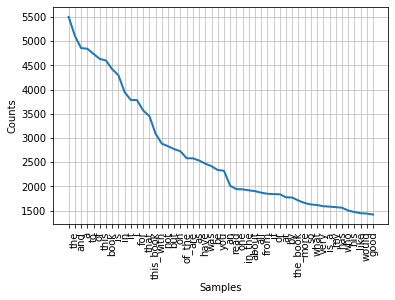

In [ ]:
# la distribucion de frecuencias es diferente por que el corpus que tenenmos 
# es más grande y más general.
fdist.plot(50)

In [ ]:
reduced_bow = [w for w in set(bag_of_words) if fdist[w]>100]
len(reduced_bow)

1214

In [ ]:
import numpy as np

vectors = []
labels = []
for line in text.split('\n'):
  seq = line.split('#label#:')
  if len(seq)==2:
    line_dict = {keyval.split(':')[0]: int(keyval.split(':')[1]) for keyval in seq[0].split(' ') if len(keyval.split(':'))==2}
    line_vector = []
    for word in reduced_bow:
      if word in line_dict.keys():
        line_vector.append(line_dict[word])
      else:
        line_vector.append(0)
    vectors.append(line_vector)
    labels.append(float(seq[1]))

vectors = np.array(vectors)

In [ ]:
vectors

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
set(labels).                                                

{1.0, 2.0, 4.0, 5.0}

In [ ]:
from sklearn.model_selection import train_test_split

train_vectors, test_vectors, train_labels, test_labels = train_test_split(vectors, labels, test_size=0.1, random_state=42)
print('longitud dataset de entrenamiento: {}'.format(len(train_vectors)))
print('longitud dataset de evaluación: {}'.format(len(test_vectors)))

from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB().fit(train_vectors, train_labels)
clf.score(test_vectors, test_labels)

longitud dataset de entrenamiento: 4950
longitud dataset de evaluación: 551


0.5081669691470054

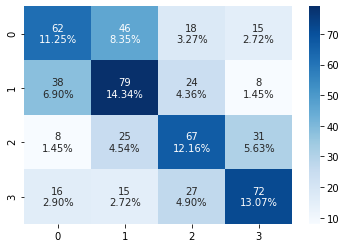

In [ ]:
cm = confusion_matrix(test_labels, clf.predict(test_vectors))

group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]

annot = [f'{v1}\n{v2}' for v1, v2 in zip(group_counts,group_percentages)]
annot = np.asarray(annot).reshape(4,4)
sns.heatmap(cm, annot=annot, fmt='', cmap='Blues')

---
Como caso curioso, en la siguiente celda consideramos el entrenamiento de otros modelos de clasificación implementados en scikit. Con los conocimientos que ahora tienes, puedes explorar con total libertad el zoologico de modelos de clasificación que existen !! 

---

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB, ComplementNB, MultinomialNB

clf = RandomForestClassifier().fit(train_vectors, train_labels)
print('Score for RandomForestClassifier = {}'.format(clf.score(test_vectors, test_labels)))

clf = BernoulliNB().fit(train_vectors, train_labels)
print('Score for Naive Bayes Bernoulli = {}'.format(clf.score(test_vectors, test_labels)))

clf = ComplementNB().fit(train_vectors, train_labels)
print('Score for Naive Bayes Complement = {}'.format(clf.score(test_vectors, test_labels)))

Score for RandomForestClassifier = 0.4809437386569873
Score for Naive Bayes Bernoulli = 0.43920145190562615
Score for Naive Bayes Complement = 0.49909255898366606


### Trabajando con un dataset pre-procesado (modelo binario +/-)

Ahora trabajaremos con el dataset: **processed_acl** de la fuente: http://www.cs.jhu.edu/~mdredze/datasets/sentiment/ que se presento en la clase de presentación del reto, el cual ya tiene pre-procesados los atributos de los textos junto con la etiqueta de sentimiento de cada uno, que puede ser `positiva` o `negativa`.  

---

In [ ]:
# el dataset lo tengo guardado en mi Drive, asi que 
# tu deberás hacer algo similar para poder ejecutar este notebook
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Ahora exploramos la estructura del dataset, **considerando solamente la categoría books**:

In [ ]:
# aqui modificas tus rutas, segun lo que tengas en tu Drive personal
f = open('/content/drive/My Drive/Data_repository/processed_acl/books/negative.review', 'r')
text_negative = f.read()
f.close()
f = open('/content/drive/My Drive/Data_repository/processed_acl/books/positive.review', 'r')
text_positive = f.read()
f.close()

In [ ]:
# ejemplo de un texto pre-procesado
text_negative.split('\n')[0]

---
Cada línea del dataset es un string tipo diccionario (donde cada llave-valor son el feature y el numero de veces que aparece en el texto), al final la categoria aparece como `#label#:` y el valor negative o positive, según el caso:

```
feature1: 1 feature2: 2, ... #label#: negative

```

Así, de esta estructura podemos considerar un tipo de vectorización no-binaria donde cada elemento del vector de texto, es el número de veces que un feature es observado en el documento, si los features los consideramos como diferentes palabras clave entonces a este proceso se le denomina vectorizacion por bolsa de palabras o **Bag of Words (BOW)**

|       | word_1 | word_2 | ... | word_n |
|-------|--------|--------|-----|--------|
| doc_1 | 1      | 2      |     | 0      |
| doc_2 | 0      | 2      |     | 1      |
| doc_3 | 3      | 1      |     | 1      |

por ejemplo, el vector del documento `doc_1` sería :

$$
[1, 2, \dots, 0]
$$

---

In [ ]:
# Aquí construirmos un bag of words con su respectiva distribucion de frecuencias
import nltk
bag_of_words = []
for line in text_negative.split('#label#:negative\n'):
  for key_value in line.split(' '):
           bag_of_words.append(key_value.split(':')[0]) 
for line in text_positive.split('#label#:positive\n'):
  for key_value in line.split(' '):
           bag_of_words.append(key_value.split(':')[0]) 
fdist = nltk.FreqDist(bag_of_words)
print('considerando todo el BOW tendríamos: {} features posibles'.format(len(fdist)))

considerando todo el BOW tendríamos: 195888 features posibles


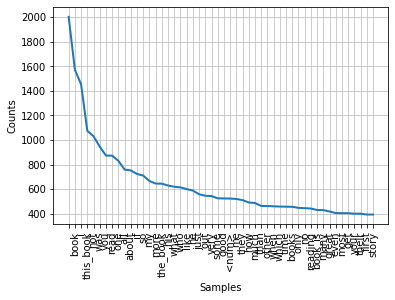

In [ ]:
# consideramos filtrar solo a un sub-grupo de features (los más frecuentes)
fdist.plot(50)

In [ ]:
# escogemos armar un BOW reducido solo con las palabras más frecuentes
reduced_bow = [w for w in set(bag_of_words) if fdist[w]>50]

In [ ]:
#aquí tendriamos la longitud de los vectores para cada texto
len(reduced_bow)

813

In [ ]:
#ahora vamos a crear el vector por cada documento
import numpy as np

vectors = []
labels = []
for line in text_negative.split('#label#:negative\n'):
  line_dict = {keyval.split(':')[0]: int(keyval.split(':')[1]) for keyval in line.split(' ') if len(keyval.split(':'))==2}
  line_vector = []
  for word in reduced_bow:
    if word in line_dict.keys():
      line_vector.append(line_dict[word])
    else:
      line_vector.append(0)
  vectors.append(line_vector)
  labels.append('negative')

for line in text_positive.split('#label#:positive\n'):
  line_dict = {keyval.split(':')[0]: int(keyval.split(':')[1]) for keyval in line.split(' ') if len(keyval.split(':'))==2}
  line_vector = []
  for word in reduced_bow:
    if word in line_dict.keys():
      line_vector.append(line_dict[word])
    else:
      line_vector.append(0)
  vectors.append(line_vector)
  labels.append('positive')

vectors = np.array(vectors)

In [ ]:
vectors.shape

(2002, 813)

In [ ]:
vectors

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
from sklearn.model_selection import train_test_split

train_vectors, test_vectors, train_labels, test_labels = train_test_split(vectors, labels, test_size=0.2, random_state=42)
print('longitud dataset de entrenamiento: {}'.format(len(train_vectors)))
print('longitud dataset de evaluación: {}'.format(len(test_vectors)))

longitud dataset de entrenamiento: 1601
longitud dataset de evaluación: 401


---
Vamos a considerar para el entrenamiento la implementación de Naive Bayes de Scikit Learn, en particular el Naive Bayes multinomial que es apropiado para este caso de vectores que  representan conteos de palabras. 

Ver referencia:

https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB 

---

In [ ]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB().fit(train_vectors, train_labels)
clf.score(test_vectors, test_labels) # este score nos devuelve el accuracy promedio. 

0.7855361596009975

---
Aquí calculamos ahora la matríz de confusión, como lo vimos en la clase de métricas de modelos donde estan cantidades como los verdaderos positivos, etc. 

Usamos scikit learn para calcular la matriz y la libreria Seaborn para dibujar el mapa de calor. Recuerda que en un caso ideal de clasificador perfecto, la matriz de confusion deberia tener todos los elementos por fuera de la diagonal como cero. 

---

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


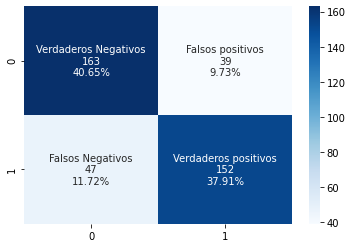

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(test_labels, clf.predict(test_vectors))
group_names = ['Verdaderos Negativos','Falsos positivos','Falsos Negativos','Verdaderos positivos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]

labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cm, annot=labels,fmt='', cmap='Blues')

## Ahora, para finalizar ...
--- 

Como puedes ver entrenar un modelo de más de dos clases es más desafiante, el accuracy del 50% nos indica que usar features tipo Bag of words y filtrando por las palabras más comunes del corpus NO es suficiente. ¿que otros tipos de vectorizaciones y selección de features crees que pueden ayudarnos a tener un mejor algoritmo de clasificación en escala numérica discreta?

También, es importante que intentes un ejercicio completo de vectorización desde cero con el dataset **sorted_data** que también encuentras en http://www.cs.jhu.edu/~mdredze/datasets/sentiment/. 

Una guía completa de vectorización de texto la encuentras en la documentación de Scikit: 

https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html


Con esto hemos terminado definitivamente el curso, ¿Verdad que aprendiste un monton de cosas?. Cuentame en los comentarios de la clase final, que te parecio el curso y que otras cosas esperas en los próximos cursos de la ruta de NLP. 


Espero que hayas disfrutado este viaje de aprendizaje. 